In [2]:
# # Apple Watch Data Analysis
# 
# This notebook explores, cleans, and analyzes Apple Watch health data to derive insights and create advanced health indices.

# %% [markdown]
# ## 1. Import Libraries and Load Data

# %%
# Data analysis and wrangling
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

# Machine learning and preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Database connection
import sqlalchemy as sal

# Set random seed for reproducibility
np.random.seed(42)

In [3]:
# Load the data
file_path = r"C:\Users\sgrka\OneDrive\Desktop\Apple watch data\OneDrive_2024-07-30\Capstone Project - All users dataset of apple watch\05\05.csv"
df = pd.read_csv(file_path)

C:\Users\sgrka\AppData\Local\Temp\ipykernel_14304\1024216359.py:3: DtypeWarning: Columns (0,1,2,3,4,5,6,10,12,16,18,20,22,25,26,27,28,29,30,32,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [4]:
# %%
def explore_data(df):
    print("First 5 rows of the dataset:")
    display(df.head())

    print("\nDataframe Info:")
    df.info()

    print("\nStatistical Summary:")
    display(df.describe())

    print("\nMissing Values:")
    display(df.isnull().sum())

    print("\nDistinct values in 'type' column:")
    print(df['type'].unique())

explore_data(df)

First 5 rows of the dataset:


,type,sourceName,value,unit,startDate,endDate,creationDate,activeEnergyBurnedGoal,activeEnergyBurned,appleStandHoursGoal,...,time,FitzpatrickSkinType,durationUnit,device,BiologicalSex,sum,key,workoutActivityType,activeEnergyBurnedUnit,appleMoveTimeGoal
0,BodyMass,Health,52,kg,2024-06-24 01:33:33 +0530,2024-06-24 01:33:33 +0530,2024-06-24 01:33:33 +0530,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,WalkingAsymmetryPercentage,Sneh,0,%,2024-06-24 00:14:50 +0530,2024-06-24 00:15:16 +0530,2024-06-24 00:27:22 +0530,NaN,NaN,NaN,...,NaN,NaN,NaN,"<<HKDevice: 0x30120ef80>, name:iPhone, manufac...",NaN,NaN,NaN,NaN,NaN,NaN
2,WalkingDoubleSupportPercentage,Sneh,0.286,%,2024-06-24 00:14:50 +0530,2024-06-24 00:15:16 +0530,2024-06-24 00:27:22 +0530,NaN,NaN,NaN,...,NaN,NaN,NaN,"<<HKDevice: 0x30120c8c0>, name:iPhone, manufac...",NaN,NaN,NaN,NaN,NaN,NaN
3,WalkingSpeed,Sneh,4.248,km/hr,2024-06-24 00:14:50 +0530,2024-06-24 00:15:16 +0530,2024-06-24 00:27:22 +0530,NaN,NaN,NaN,...,NaN,NaN,NaN,"<<HKDevice: 0x3012f6850>, name:iPhone, manufac...",NaN,NaN,NaN,NaN,NaN,NaN
4,WalkingStepLength,Sneh,60,cm,2024-06-24 00:14:50 +0530,2024-06-24 00:15:16 +0530,2024-06-24 00:27:22 +0530,NaN,NaN,NaN,...,NaN,NaN,NaN,"<<HKDevice: 0x30120c8c0>, name:iPhone, manufac...",NaN,NaN,NaN,NaN,NaN,NaN



Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351455 entries, 0 to 351454
Data columns (total 36 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   type                         275429 non-null  object 
 1   sourceName                   275389 non-null  object 
 2   value                        322992 non-null  object 
 3   unit                         273630 non-null  object 
 4   startDate                    275438 non-null  object 
 5   endDate                      275438 non-null  object 
 6   creationDate                 275389 non-null  object 
 7   activeEnergyBurnedGoal       307 non-null     float64
 8   activeEnergyBurned           307 non-null     float64
 9   appleStandHoursGoal          307 non-null     float64
 10  CardioFitnessMedicationsUse  1 non-null       object 
 11  duration                     18 non-null      float64
 12  locale                       1 non-null  

,activeEnergyBurnedGoal,activeEnergyBurned,appleStandHoursGoal,duration,appleExerciseTime,appleExerciseTimeGoal,bpm,average,appleMoveTime,maximum,minimum,appleStandHours,sum,appleMoveTimeGoal
count,307.000000,307.000000,307.0,18.000000,307.000000,307.0,27615.000000,7.000000,307.0,7.000000,7.000000,307.000000,42.000000,307.0
mean,245.928339,106.207981,12.0,37.782867,8.426710,30.0,94.477023,124.039429,0.0,155.285714,98.857143,4.338762,74.892682,0.0
std,31.695571,106.390064,0.0,24.371655,14.594643,0.0,16.232688,10.035590,0.0,16.121562,12.601965,4.271340,82.693305,0.0
min,0.000000,0.000000,12.0,6.970045,0.000000,30.0,34.000000,110.330000,0.0,134.000000,84.000000,0.000000,0.213342,0.0
25%,250.000000,0.000000,12.0,13.826426,0.000000,30.0,83.000000,117.577000,0.0,146.500000,87.500000,0.000000,13.713675,0.0
50%,250.000000,86.729000,12.0,36.851533,3.000000,30.0,94.000000,124.511000,0.0,157.000000,103.000000,4.000000,43.759350,0.0
75%,250.000000,180.037000,12.0,62.249799,12.000000,30.0,105.000000,129.644000,0.0,159.500000,107.000000,7.000000,96.646525,0.0
max,250.000000,480.022000,12.0,75.730183,95.000000,30.0,194.000000,138.993000,0.0,184.000000,116.000000,24.000000,352.000000,0.0



Missing Values:


type                            76026
sourceName                      76066
value                           28463
unit                            77825
startDate                       76017
endDate                         76017
creationDate                    76066
activeEnergyBurnedGoal         351148
activeEnergyBurned             351148
appleStandHoursGoal            351148
CardioFitnessMedicationsUse    351454
duration                       351437
locale                         351454
appleExerciseTime              351148
appleExerciseTimeGoal          351148
bpm                            323840
date                           351446
average                        351448
sourceVersion                   76066
appleMoveTime                  351148
DateOfBirth                    351454
maximum                        351448
BloodType                      351454
minimum                        351448
appleStandHours                351148
dateComponents                 351148
time        


Distinct values in 'type' column:
['BodyMass' 'WalkingAsymmetryPercentage' 'WalkingDoubleSupportPercentage'
 'WalkingSpeed' 'WalkingStepLength' 'DistanceWalkingRunning' 'StepCount'
 'FlightsClimbed' 'HeadphoneAudioExposure' 'AppleWalkingSteadiness'
 'HeartRate' 'ActiveEnergyBurned' 'PhysicalEffort' 'BasalEnergyBurned'
 'AppleStandTime' 'EnvironmentalAudioExposure' 'StairAscentSpeed'
 'AppleExerciseTime' 'AppleStandHour' 'HeartRateVariabilitySDNN'
 'RestingHeartRate' 'WalkingHeartRateAverage'
 'EnvironmentalSoundReduction' 'StairDescentSpeed' nan
 'HighHeartRateEvent' 'VO2Max' 'SixMinuteWalkTestDistance' 'Height'
 'HKWorkoutEventTypePause' 'HKWorkoutEventTypeMotionResumed'
 'HKWorkoutEventTypeMotionPaused']


In [5]:
# Select relevant columns
columns_to_keep = ['type', 'value', 'startDate', 'endDate', 'creationDate']
df = df[columns_to_keep]

# Convert 'value' to numeric, coercing errors to NaN
df['value'] = pd.to_numeric(df['value'], errors='coerce')

# Remove rows with null 'type' and 'value'
df = df.dropna(subset=['type', 'value'])

# Convert date columns to datetime
date_columns = ['startDate', 'endDate', 'creationDate']
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Remove rows with invalid dates
df = df.dropna(subset=date_columns)

print("Number of NaN values in each column after cleaning:")
print(df.isna().sum())

Number of NaN values in each column after cleaning:
type            0
value           0
startDate       0
endDate         0
creationDate    0
dtype: int64


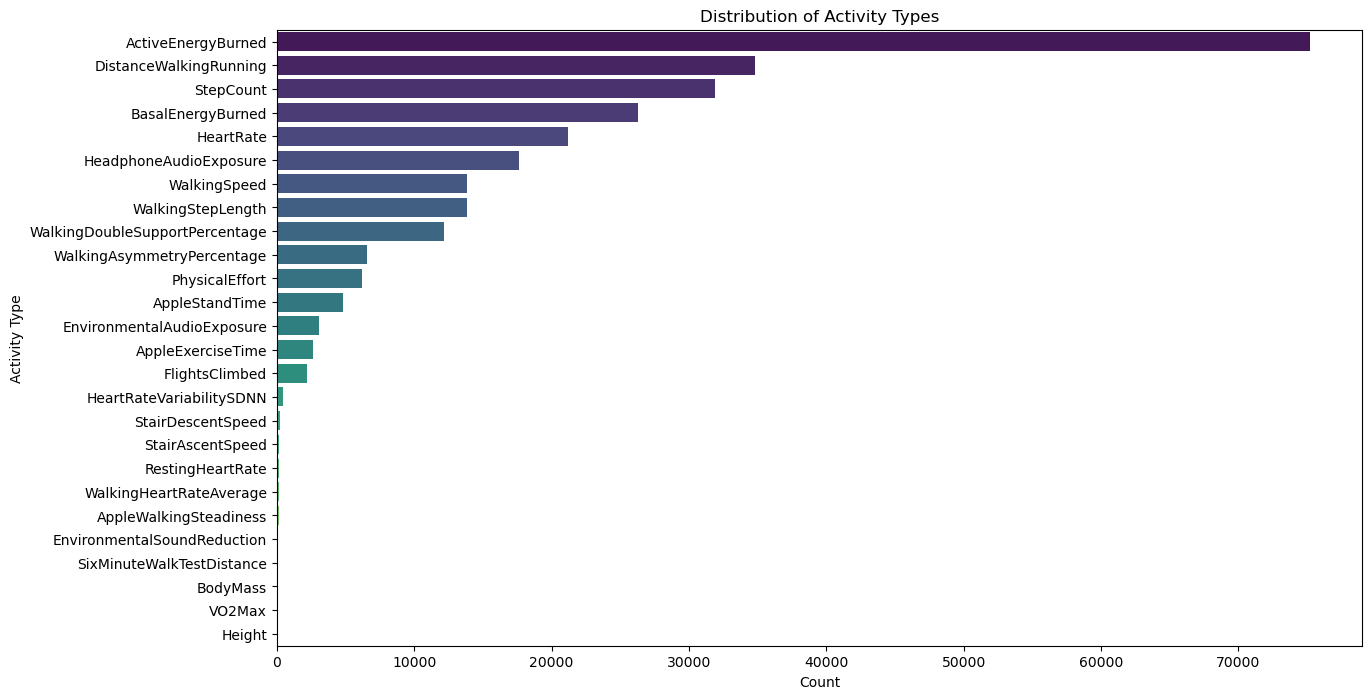

In [6]:
# ## 3. Data Visualization

# %%
def plot_activity_distribution(df):
    plt.figure(figsize=(14, 8))
    sns.countplot(y=df['type'], order=df['type'].value_counts().index, palette='viridis')
    plt.title('Distribution of Activity Types')
    plt.xlabel('Count')
    plt.ylabel('Activity Type')
    plt.show()

plot_activity_distribution(df)


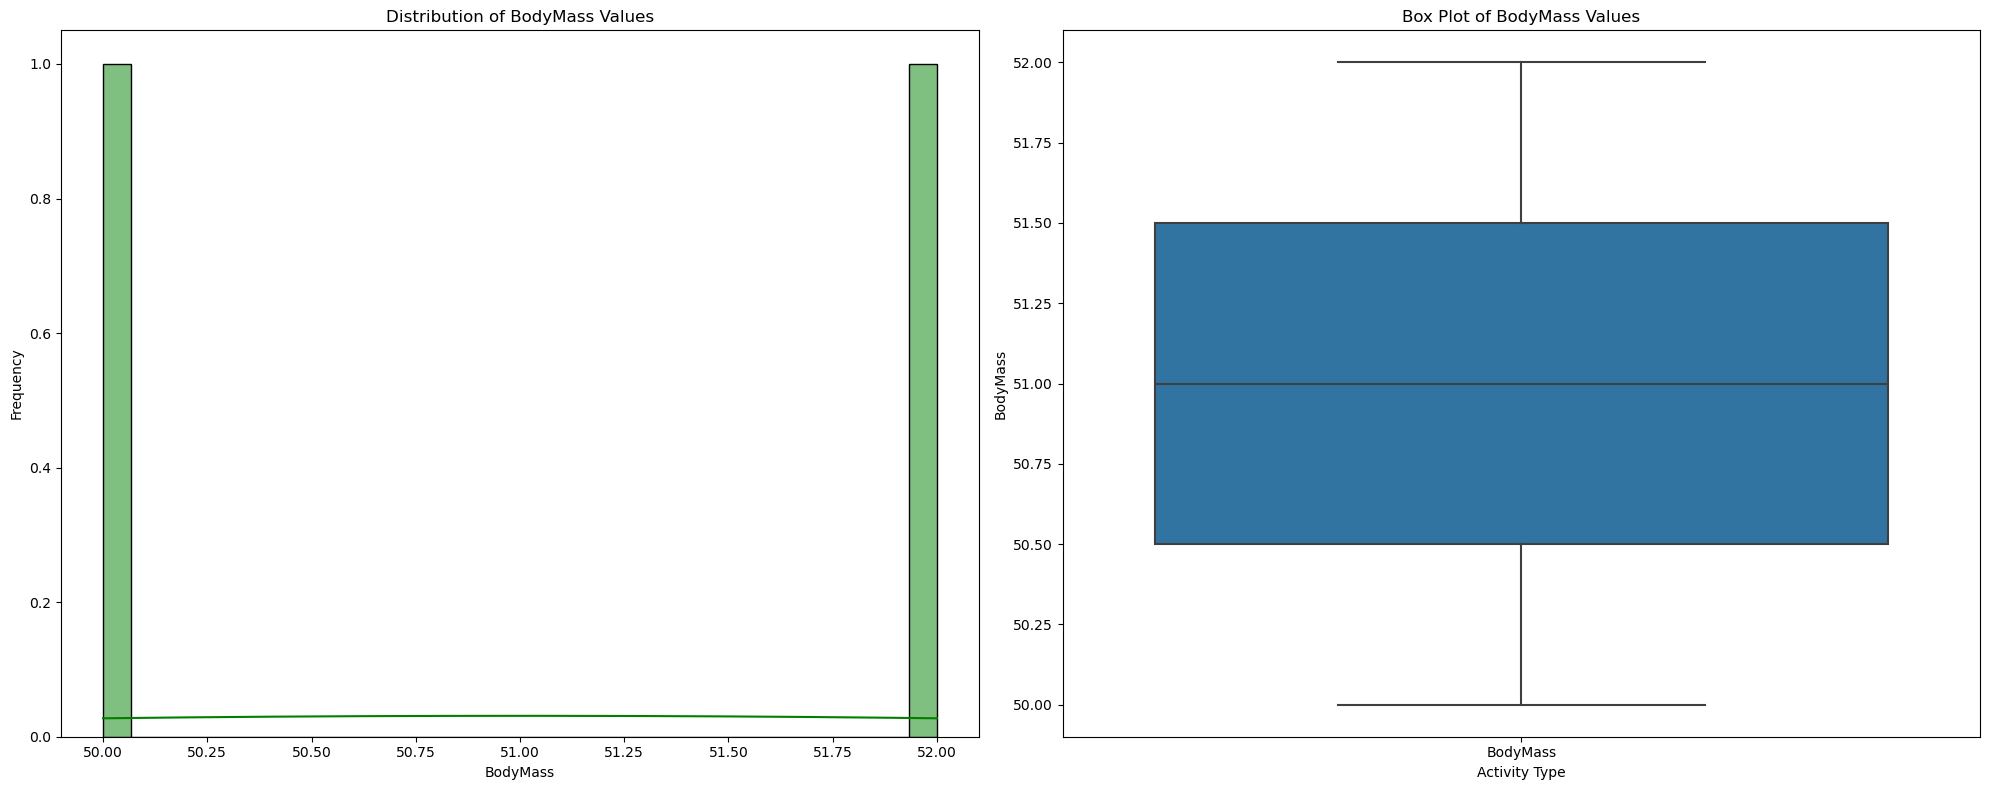

Statistics for BodyMass:
count     2.000000
mean     51.000000
std       1.414214
min      50.000000
25%      50.500000
50%      51.000000
75%      51.500000
max      52.000000
Name: value, dtype: float64


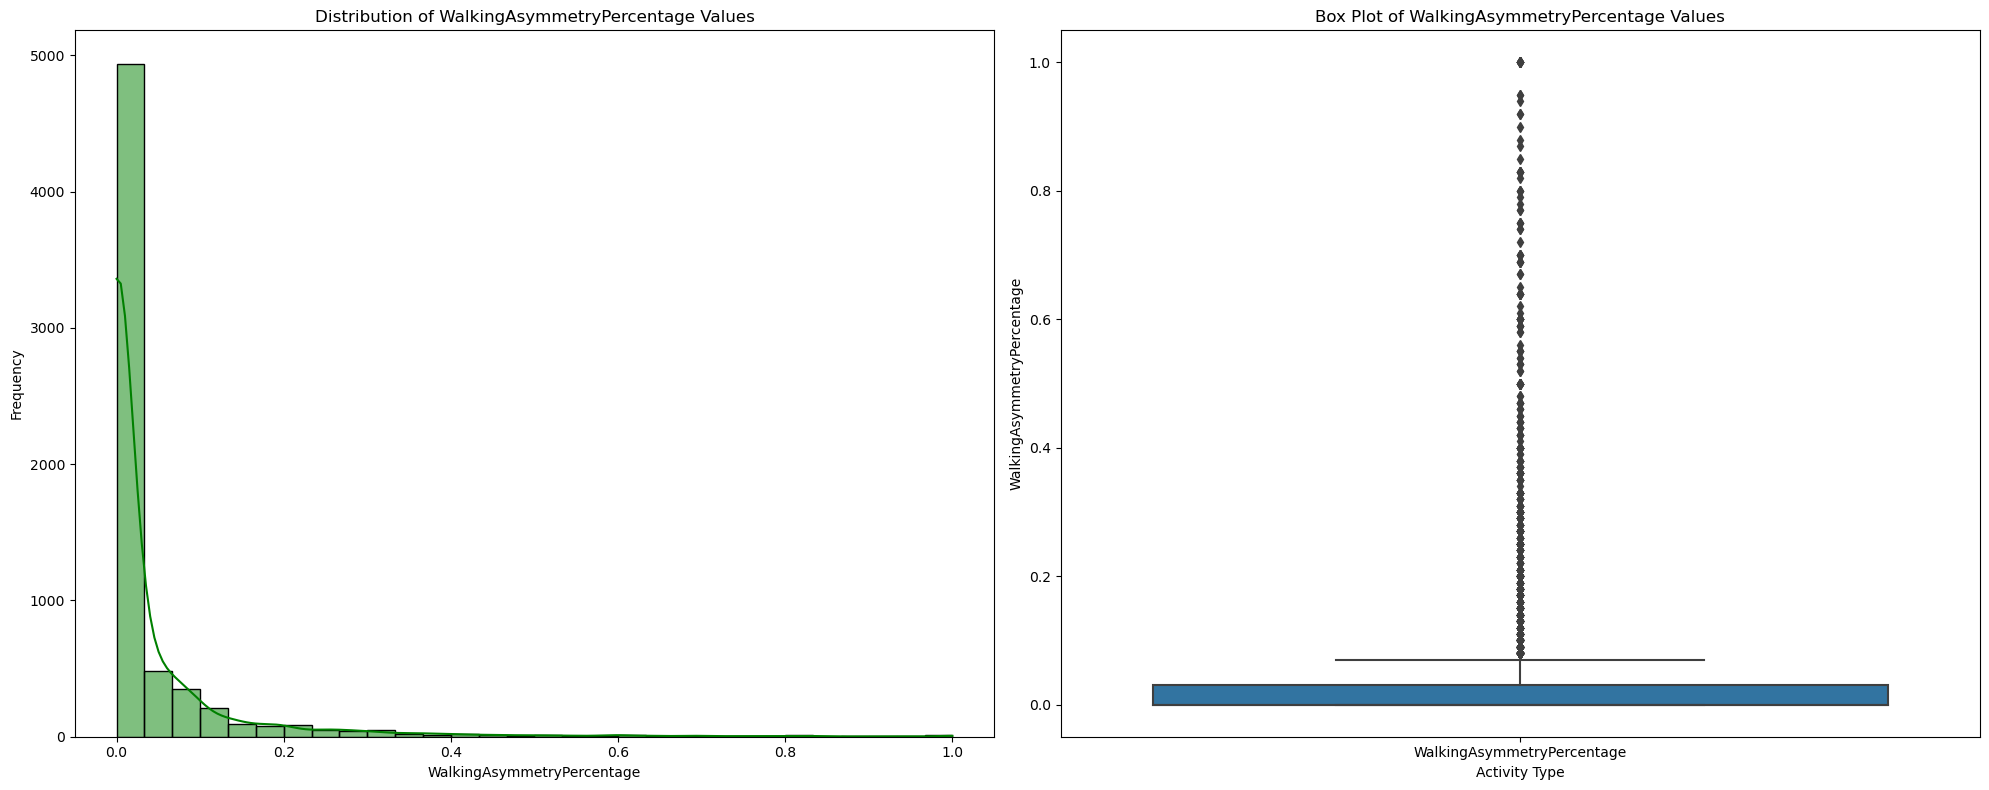

Statistics for WalkingAsymmetryPercentage:
count    6549.000000
mean        0.041080
std         0.107036
min         0.000000
25%         0.000000
50%         0.000000
75%         0.030000
max         1.000000
Name: value, dtype: float64


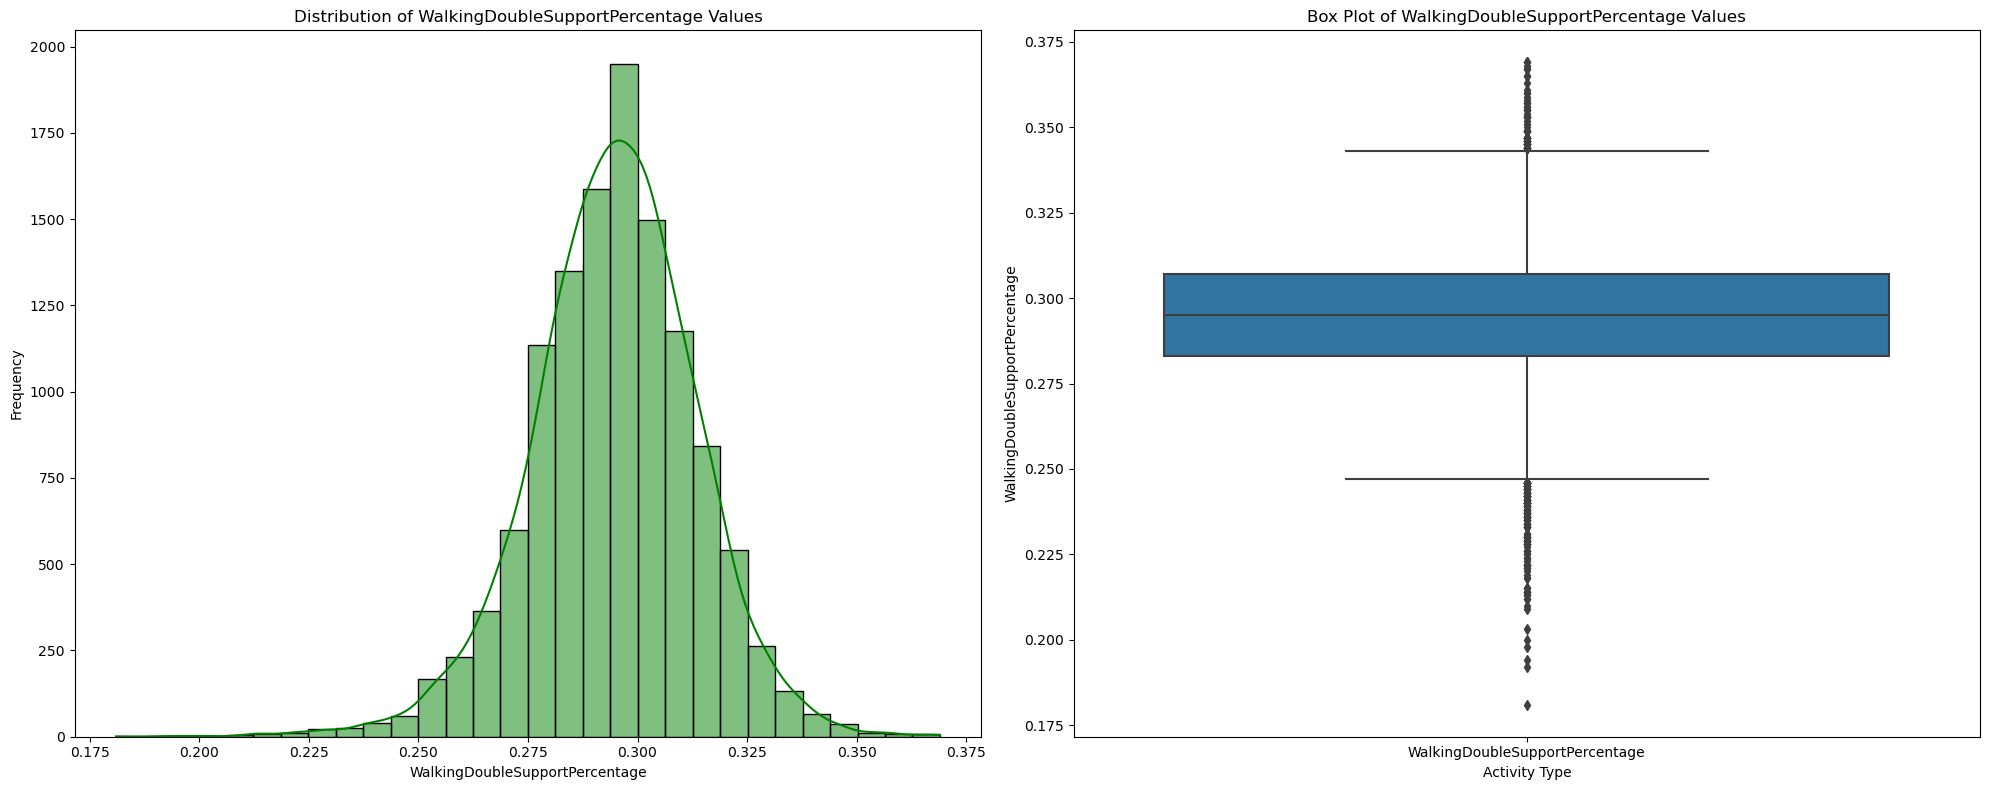

Statistics for WalkingDoubleSupportPercentage:
count    12139.000000
mean         0.294599
std          0.018871
min          0.181000
25%          0.283000
50%          0.295000
75%          0.307000
max          0.369000
Name: value, dtype: float64


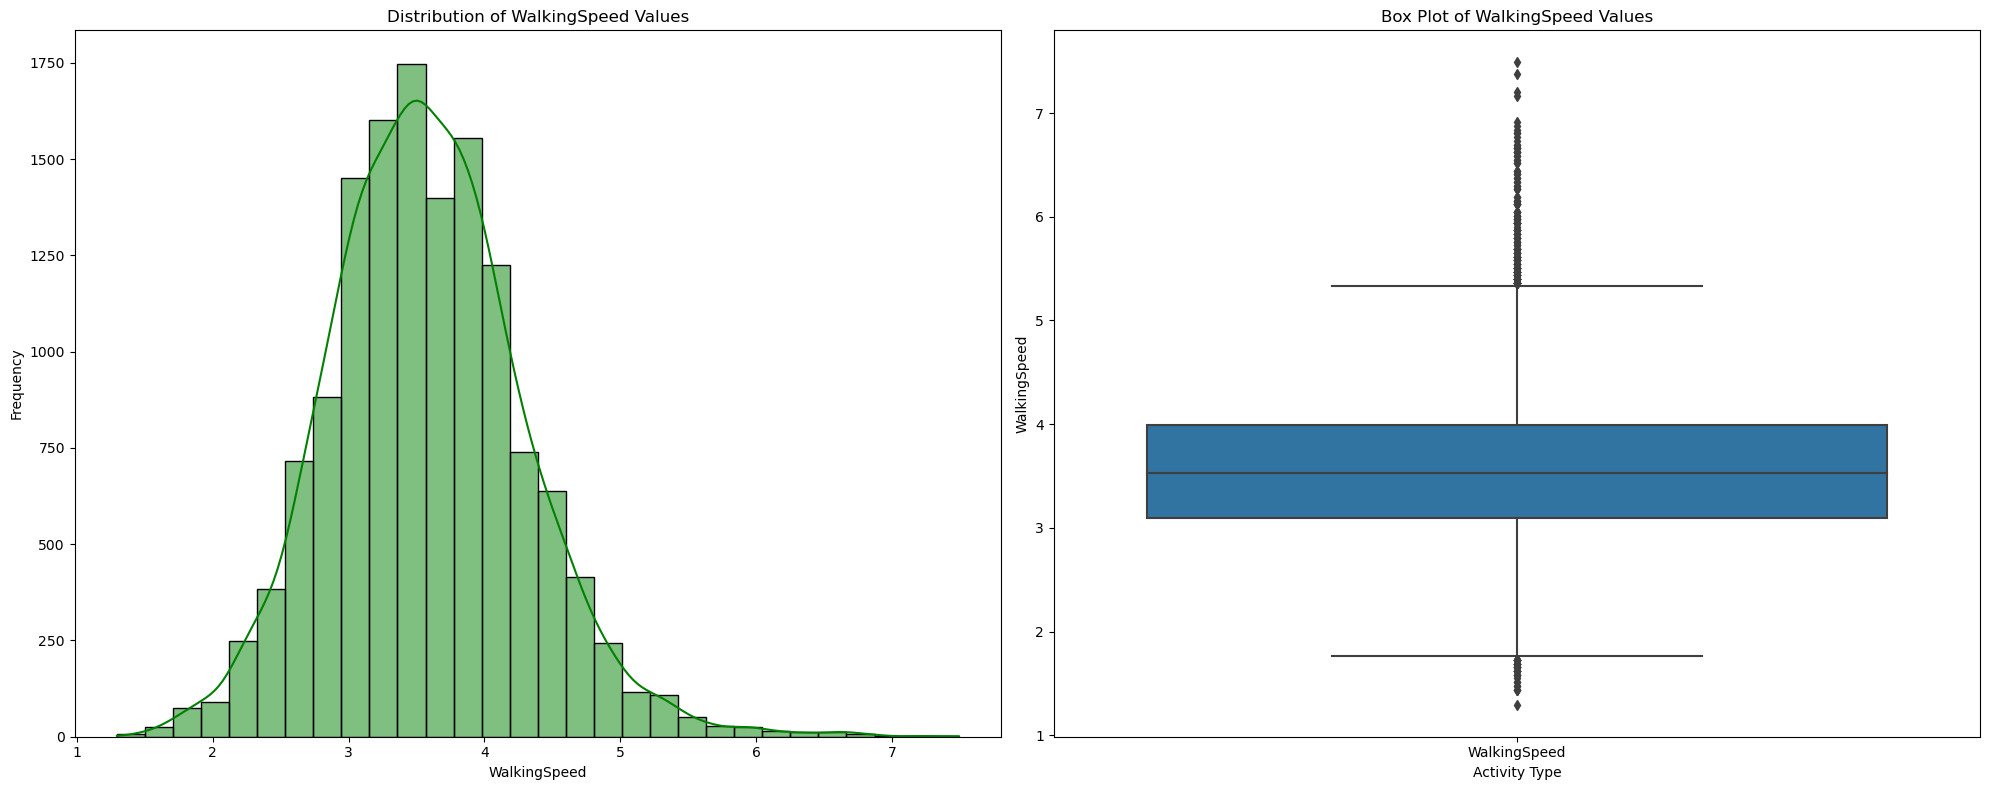

Statistics for WalkingSpeed:
count    13820.000000
mean         3.573078
std          0.712746
min          1.296000
25%          3.096000
50%          3.528000
75%          3.996000
max          7.488000
Name: value, dtype: float64


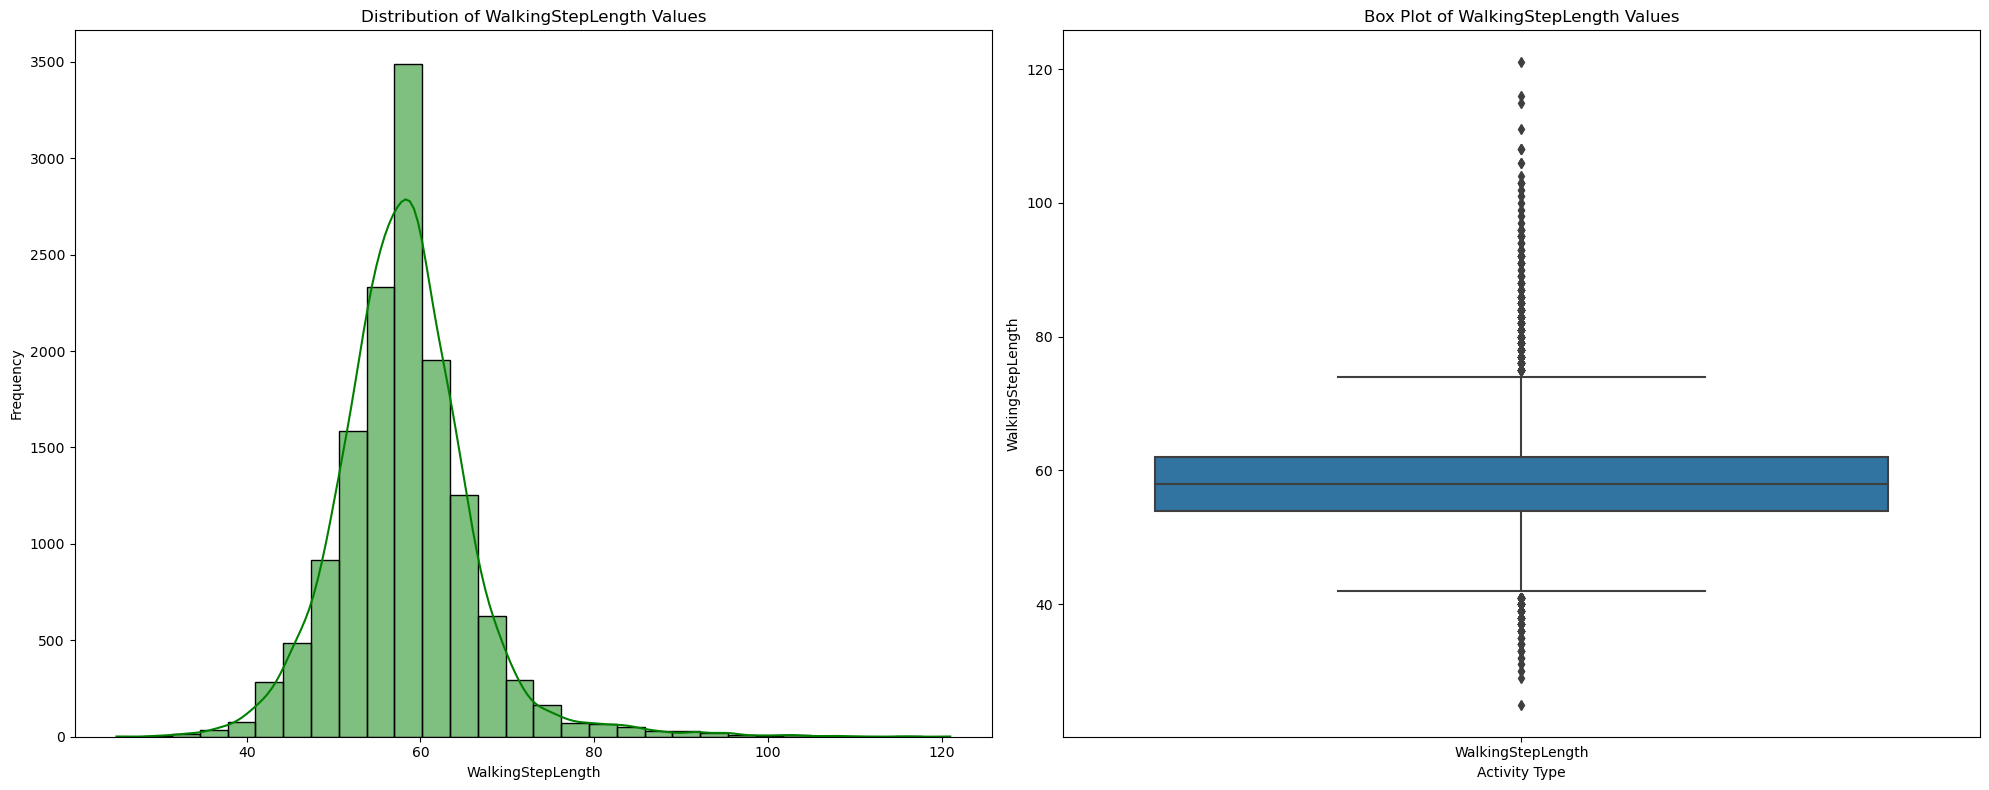

Statistics for WalkingStepLength:
count    13819.000000
mean        58.121644
std          7.788001
min         25.000000
25%         54.000000
50%         58.000000
75%         62.000000
max        121.000000
Name: value, dtype: float64


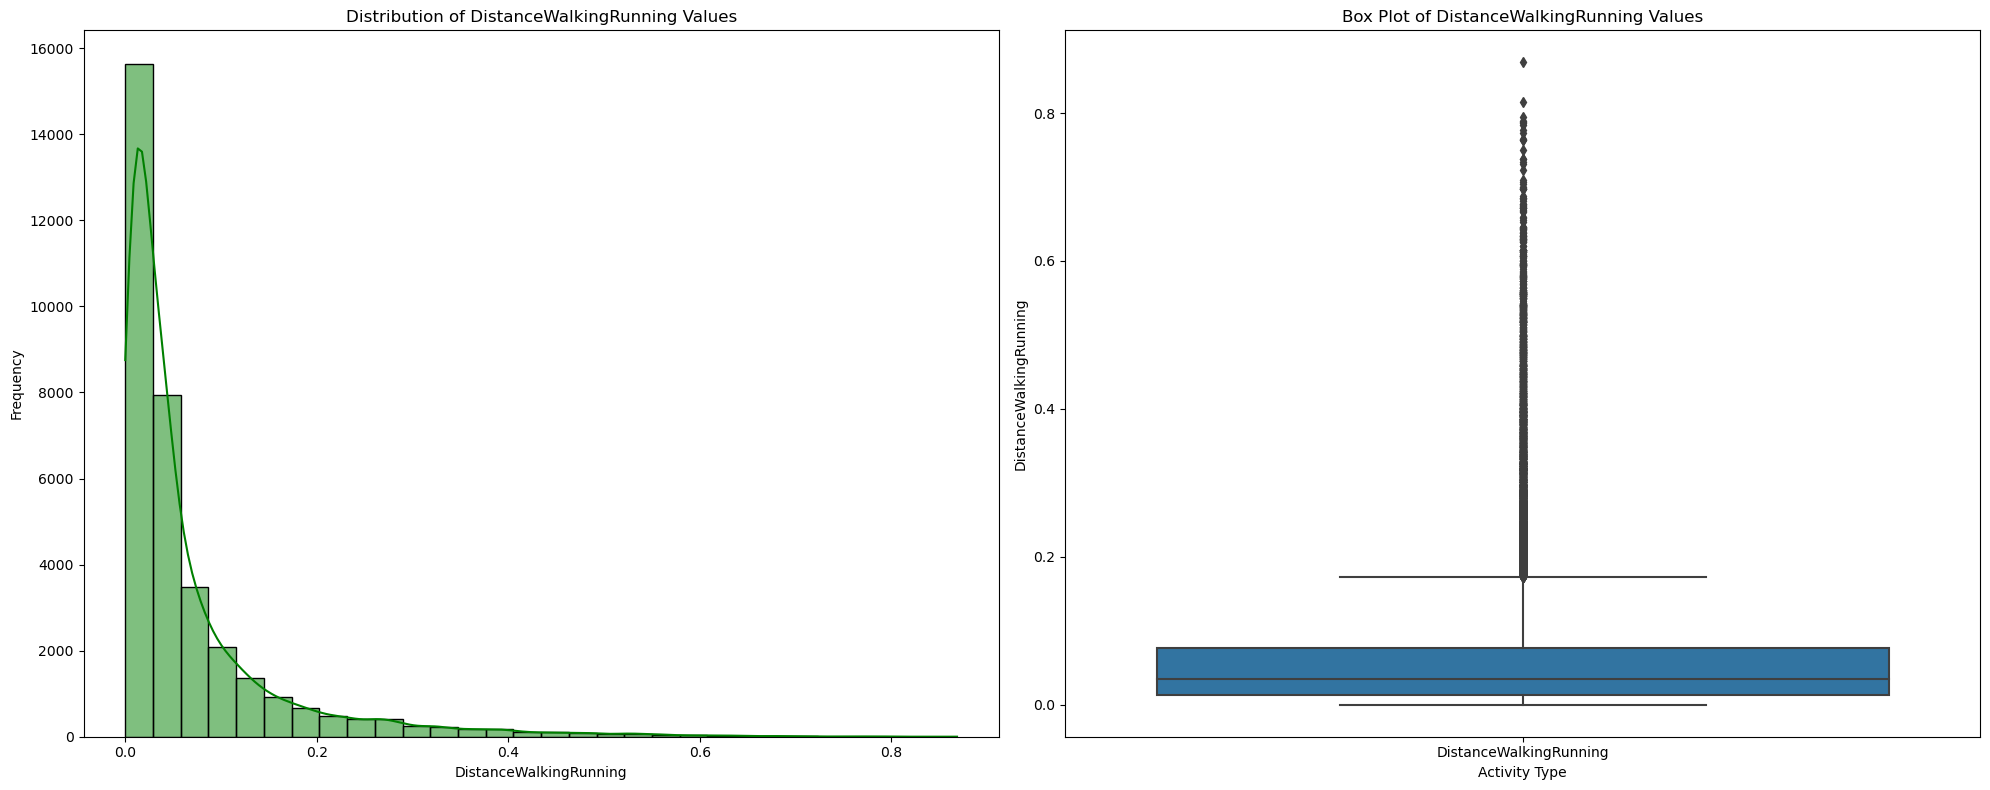

Statistics for DistanceWalkingRunning:
count    34793.000000
mean         0.067106
std          0.093491
min          0.000008
25%          0.013120
50%          0.034470
75%          0.076970
max          0.868550
Name: value, dtype: float64


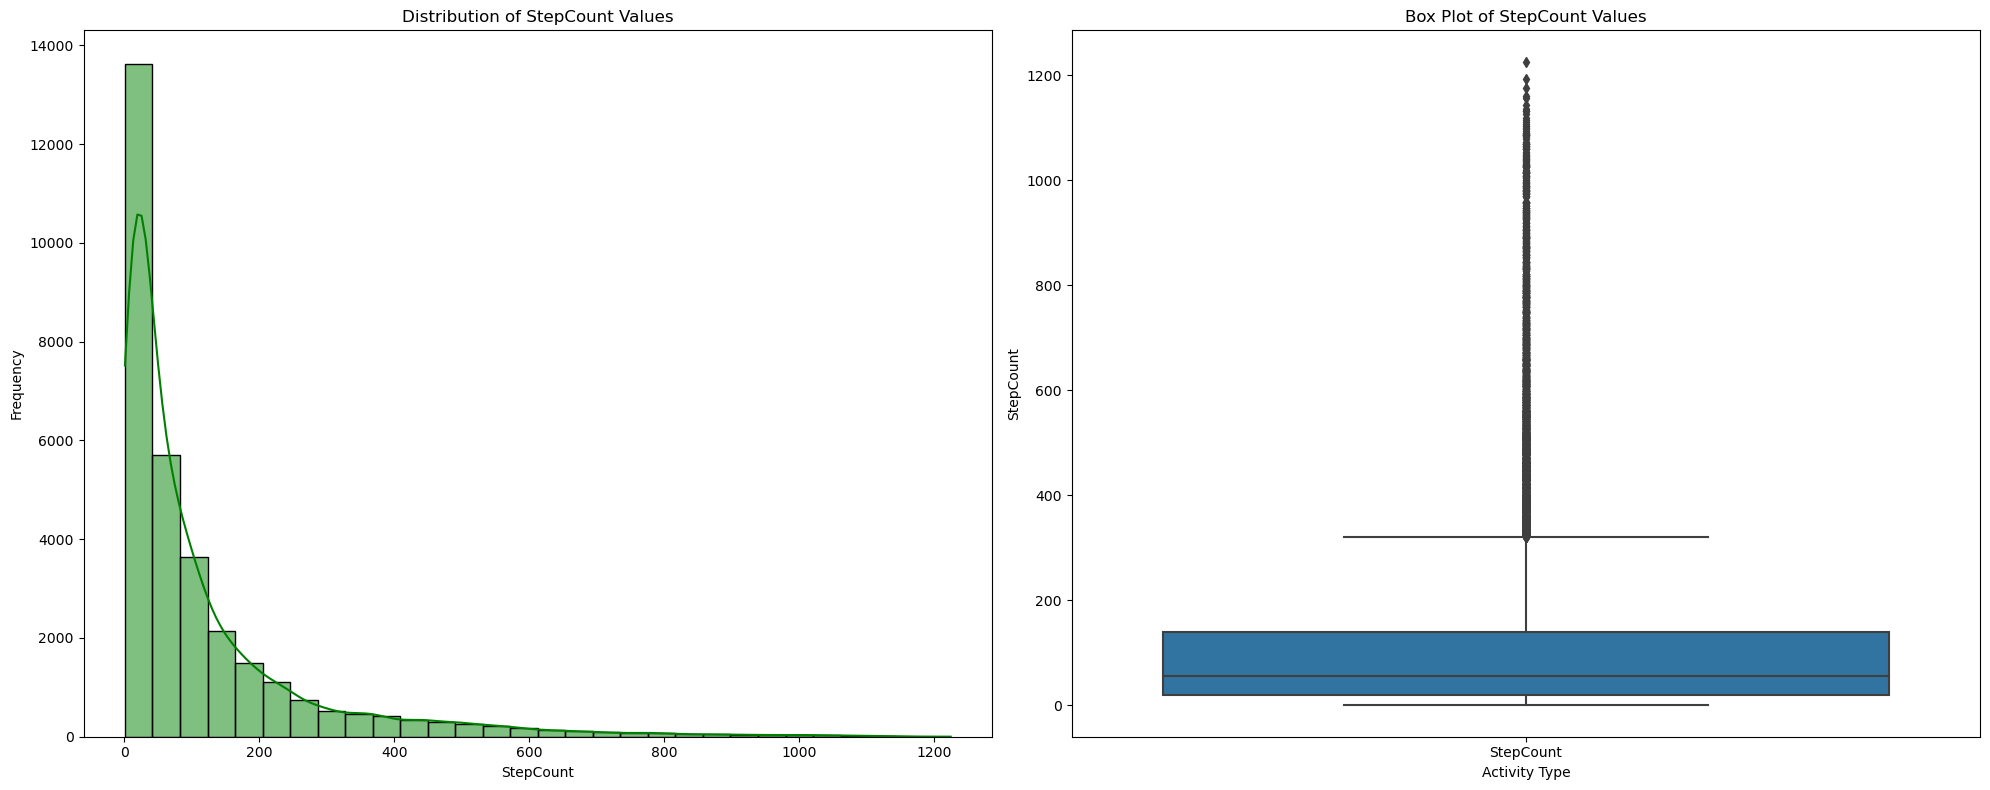

Statistics for StepCount:
count    31909.000000
mean       116.261024
std        159.530055
min          1.000000
25%         20.000000
50%         56.000000
75%        140.000000
max       1224.000000
Name: value, dtype: float64


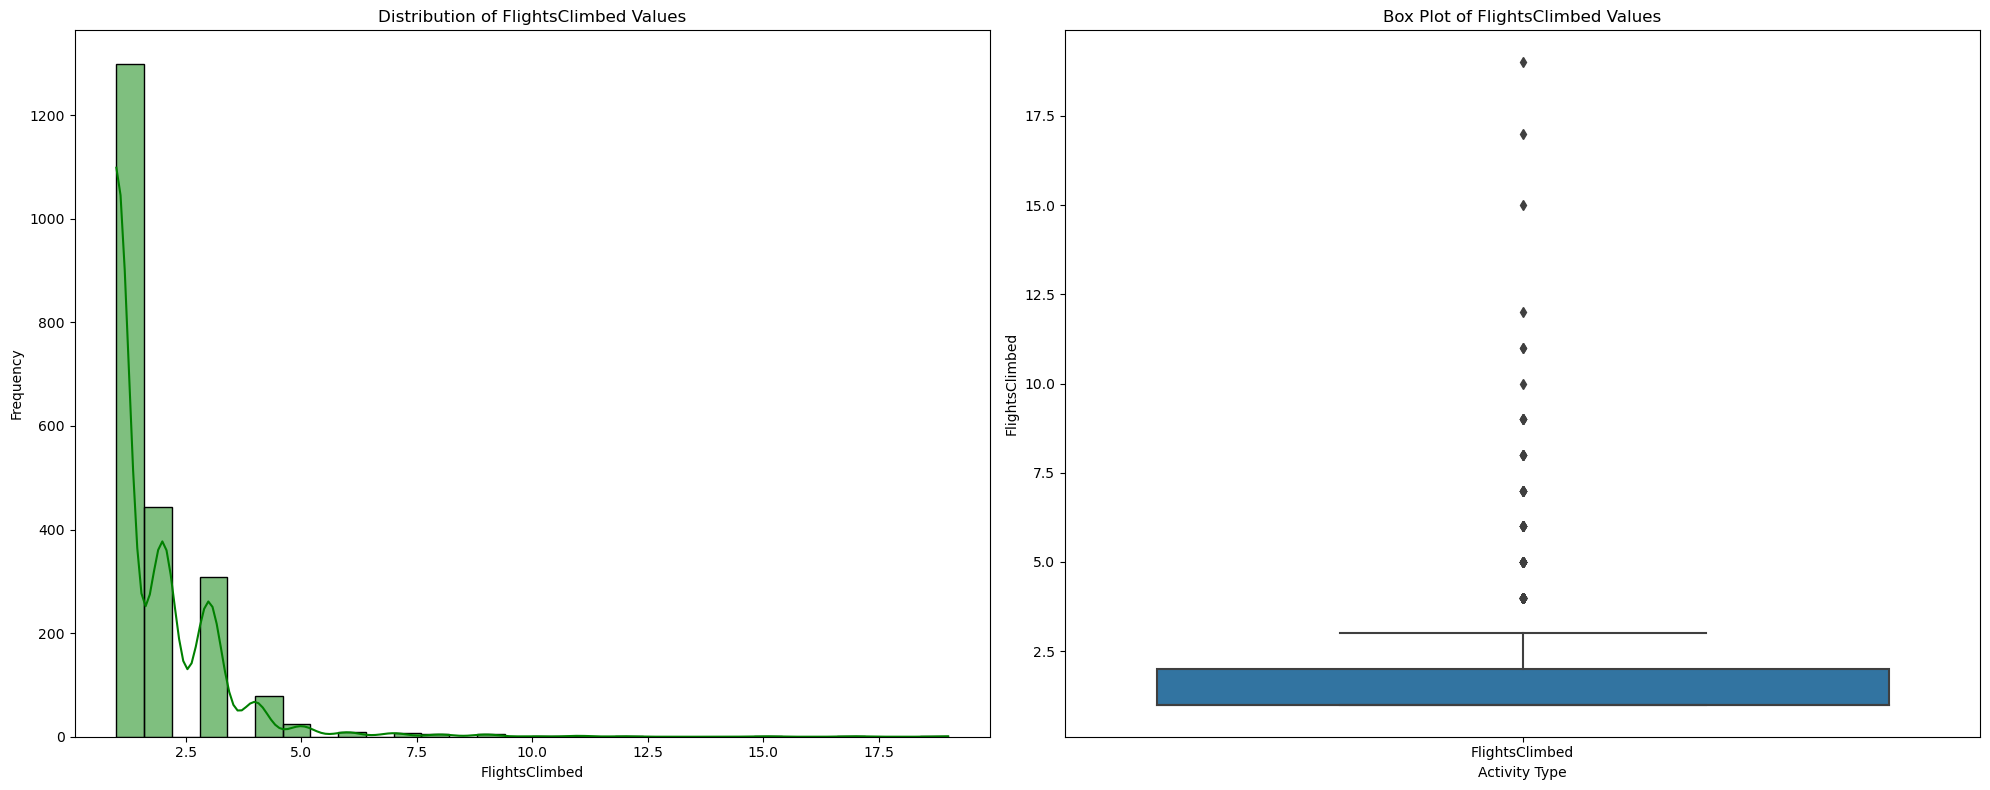

Statistics for FlightsClimbed:
count    2188.000000
mean        1.755484
std         1.318537
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        19.000000
Name: value, dtype: float64


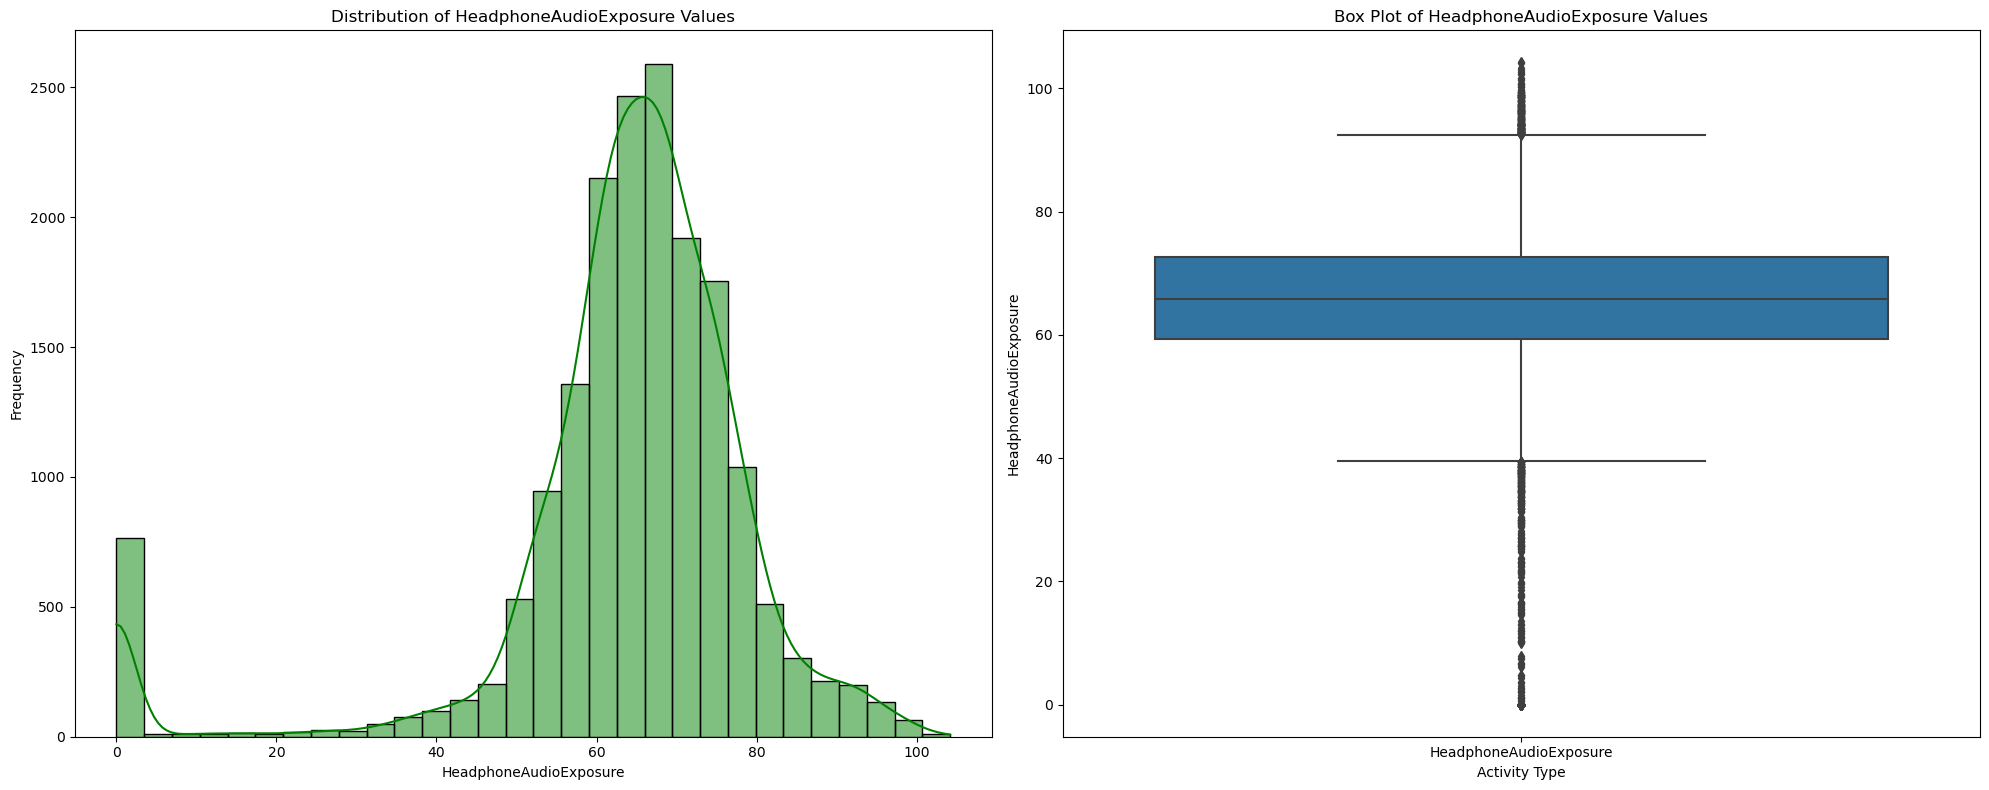

Statistics for HeadphoneAudioExposure:
count    17638.000000
mean        63.503594
std         17.257256
min          0.000000
25%         59.333600
50%         65.872600
75%         72.591175
max        104.212000
Name: value, dtype: float64


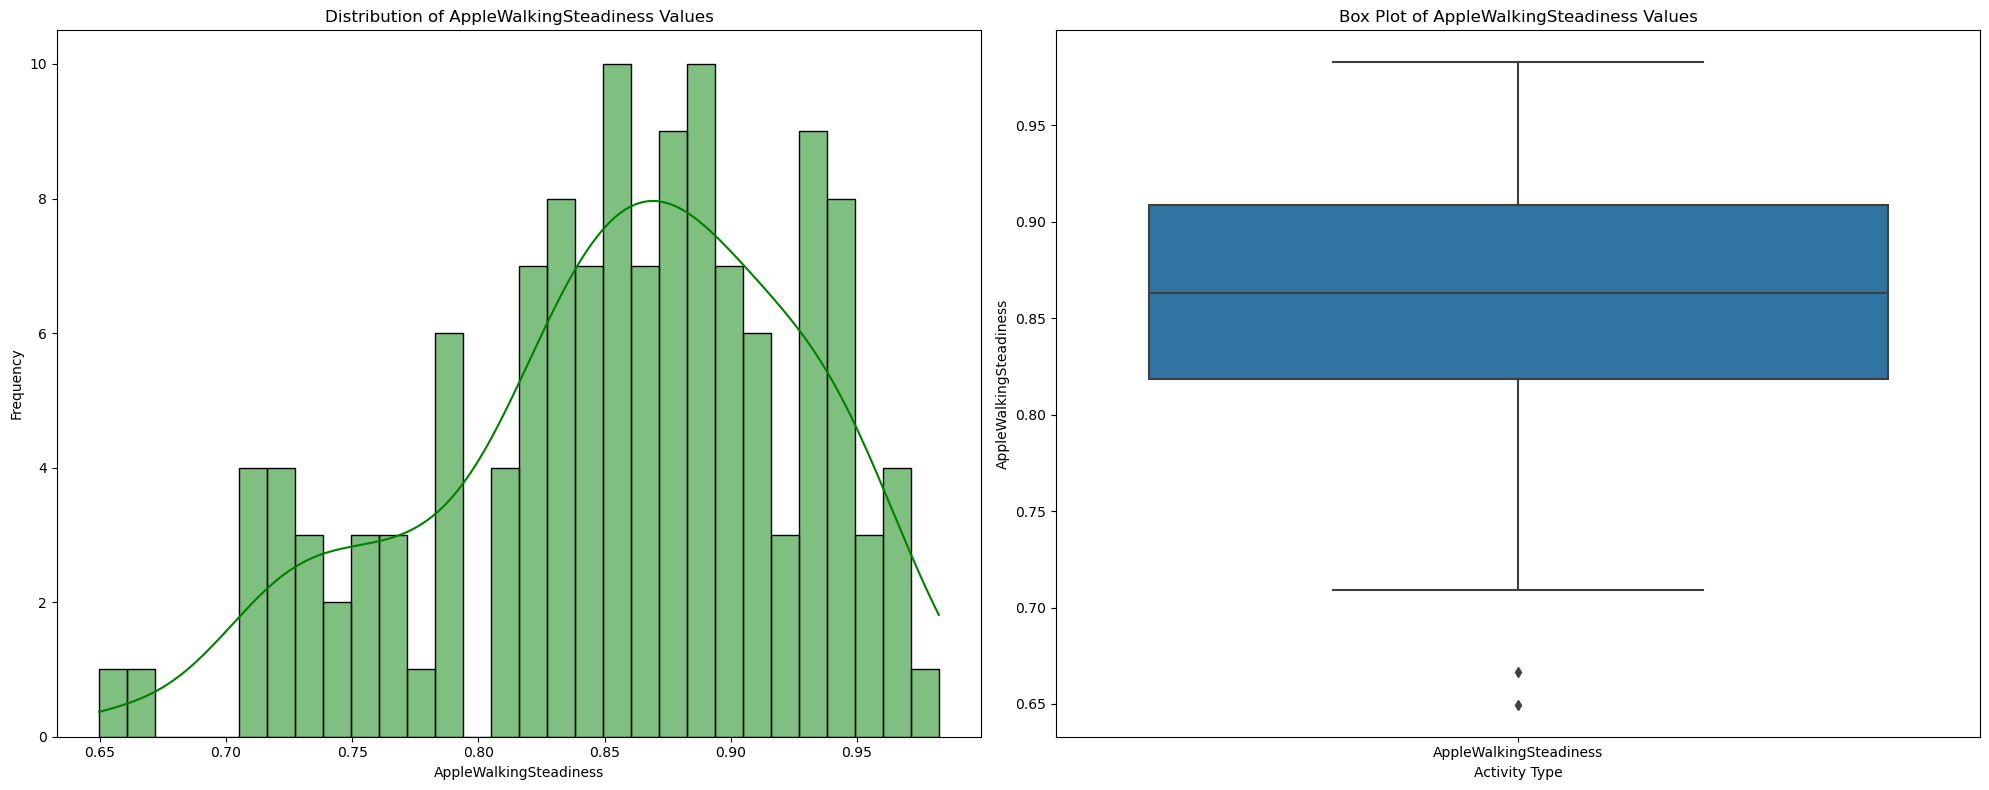

Statistics for AppleWalkingSteadiness:
count    131.000000
mean       0.854439
std        0.072245
min        0.649677
25%        0.818190
50%        0.863102
75%        0.908438
max        0.982479
Name: value, dtype: float64


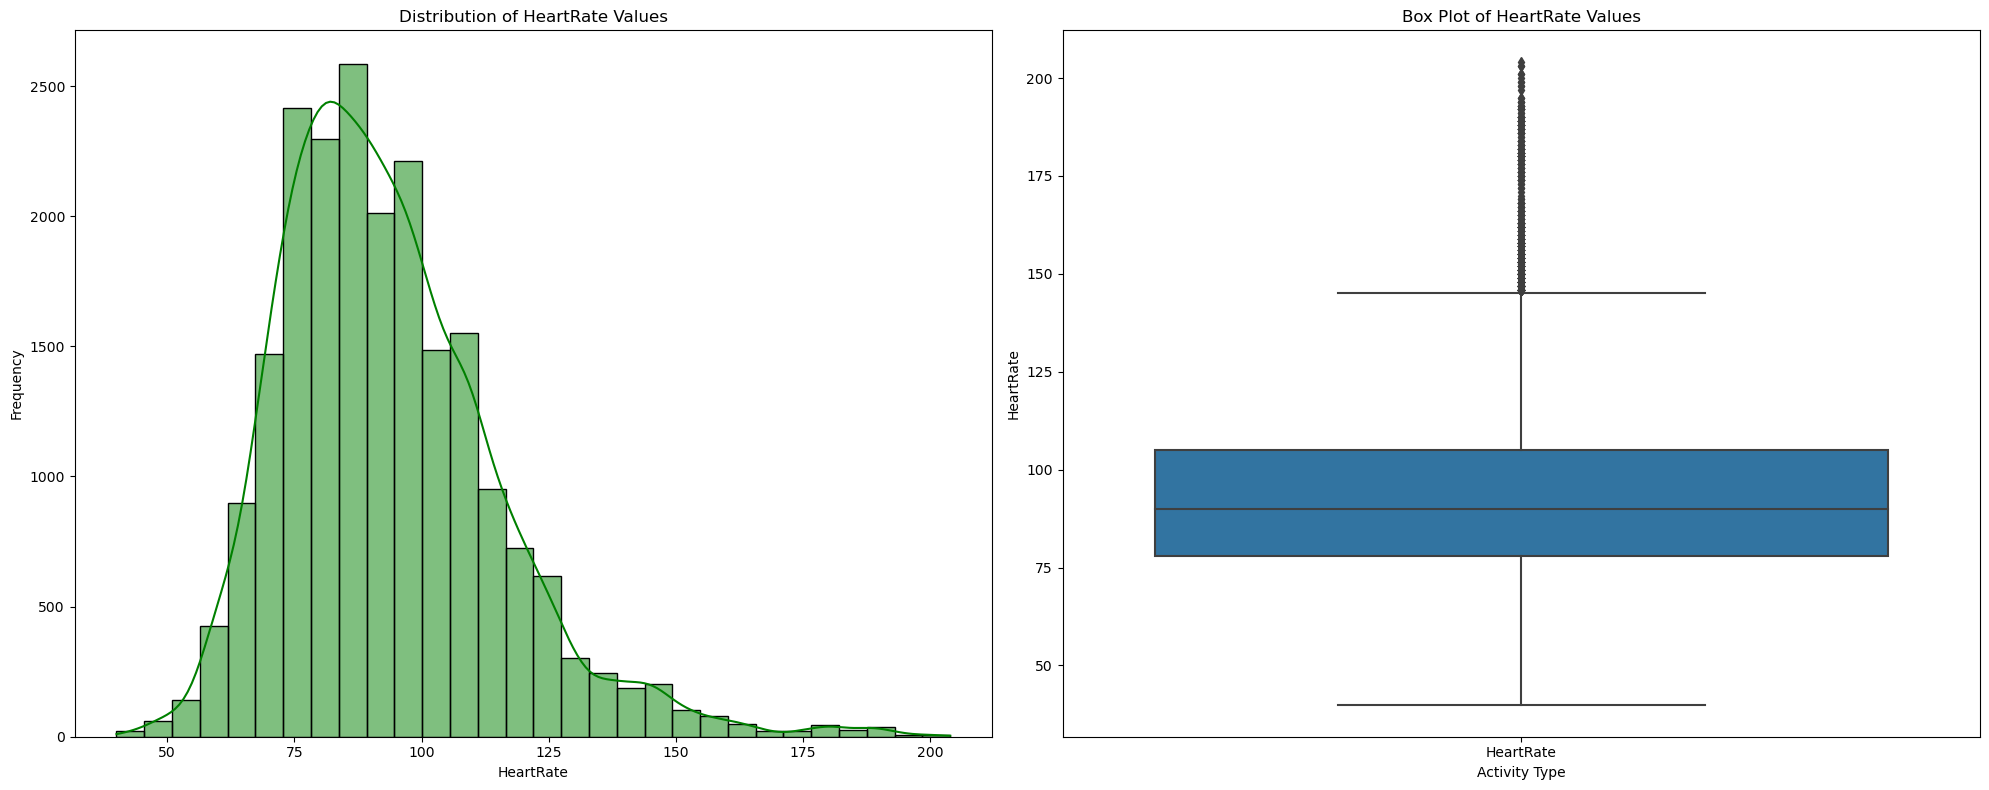

Statistics for HeartRate:
count    21194.000000
mean        93.293372
std         21.452108
min         40.000000
25%         78.000000
50%         90.000000
75%        105.000000
max        204.000000
Name: value, dtype: float64


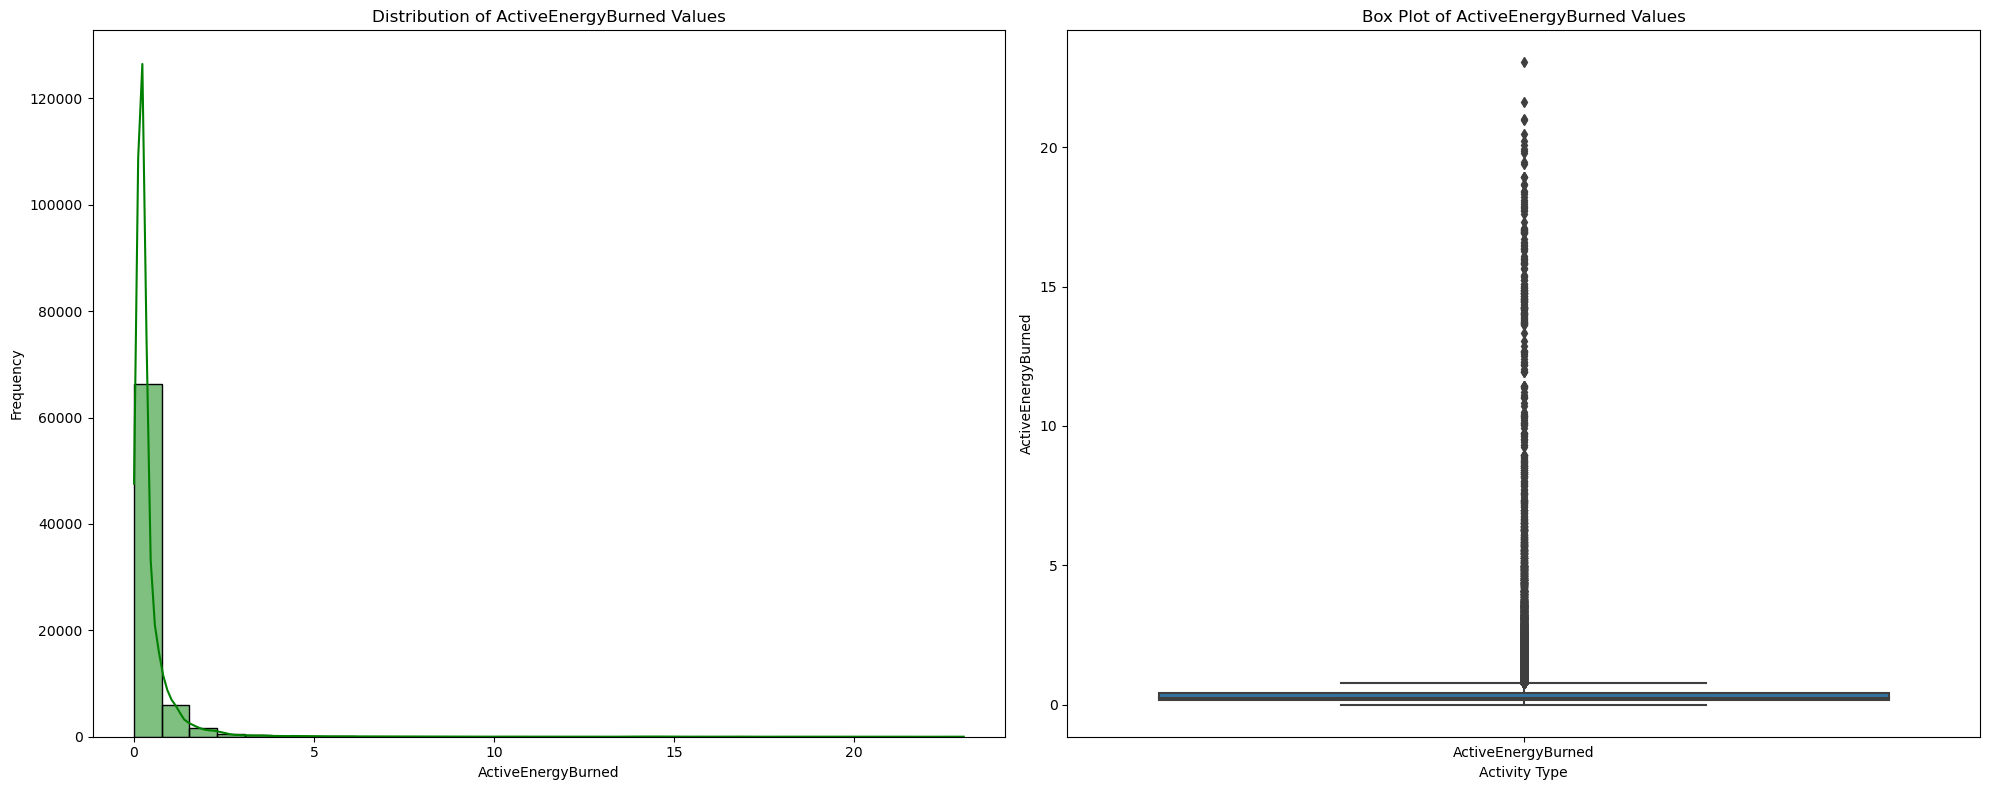

Statistics for ActiveEnergyBurned:
count    75236.000000
mean         0.434208
std          0.918154
min          0.001000
25%          0.154000
50%          0.243000
75%          0.400000
max         23.044000
Name: value, dtype: float64


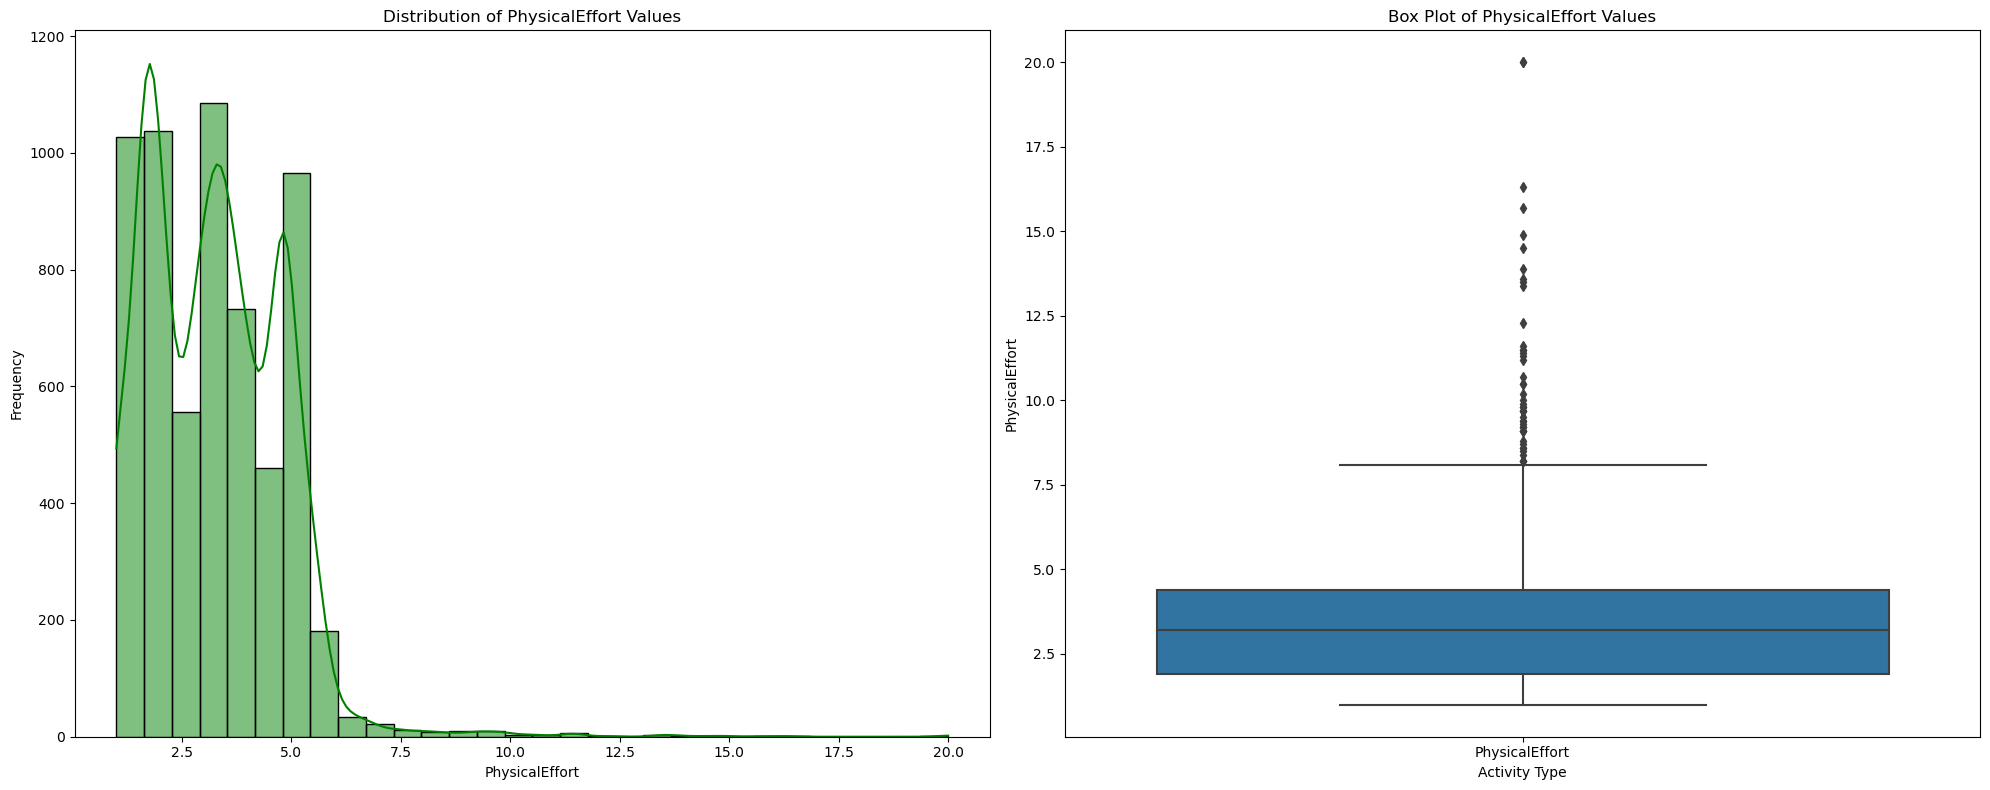

Statistics for PhysicalEffort:
count    6164.000000
mean        3.236324
std         1.559226
min         1.000000
25%         1.900000
50%         3.200000
75%         4.400000
max        20.000000
Name: value, dtype: float64


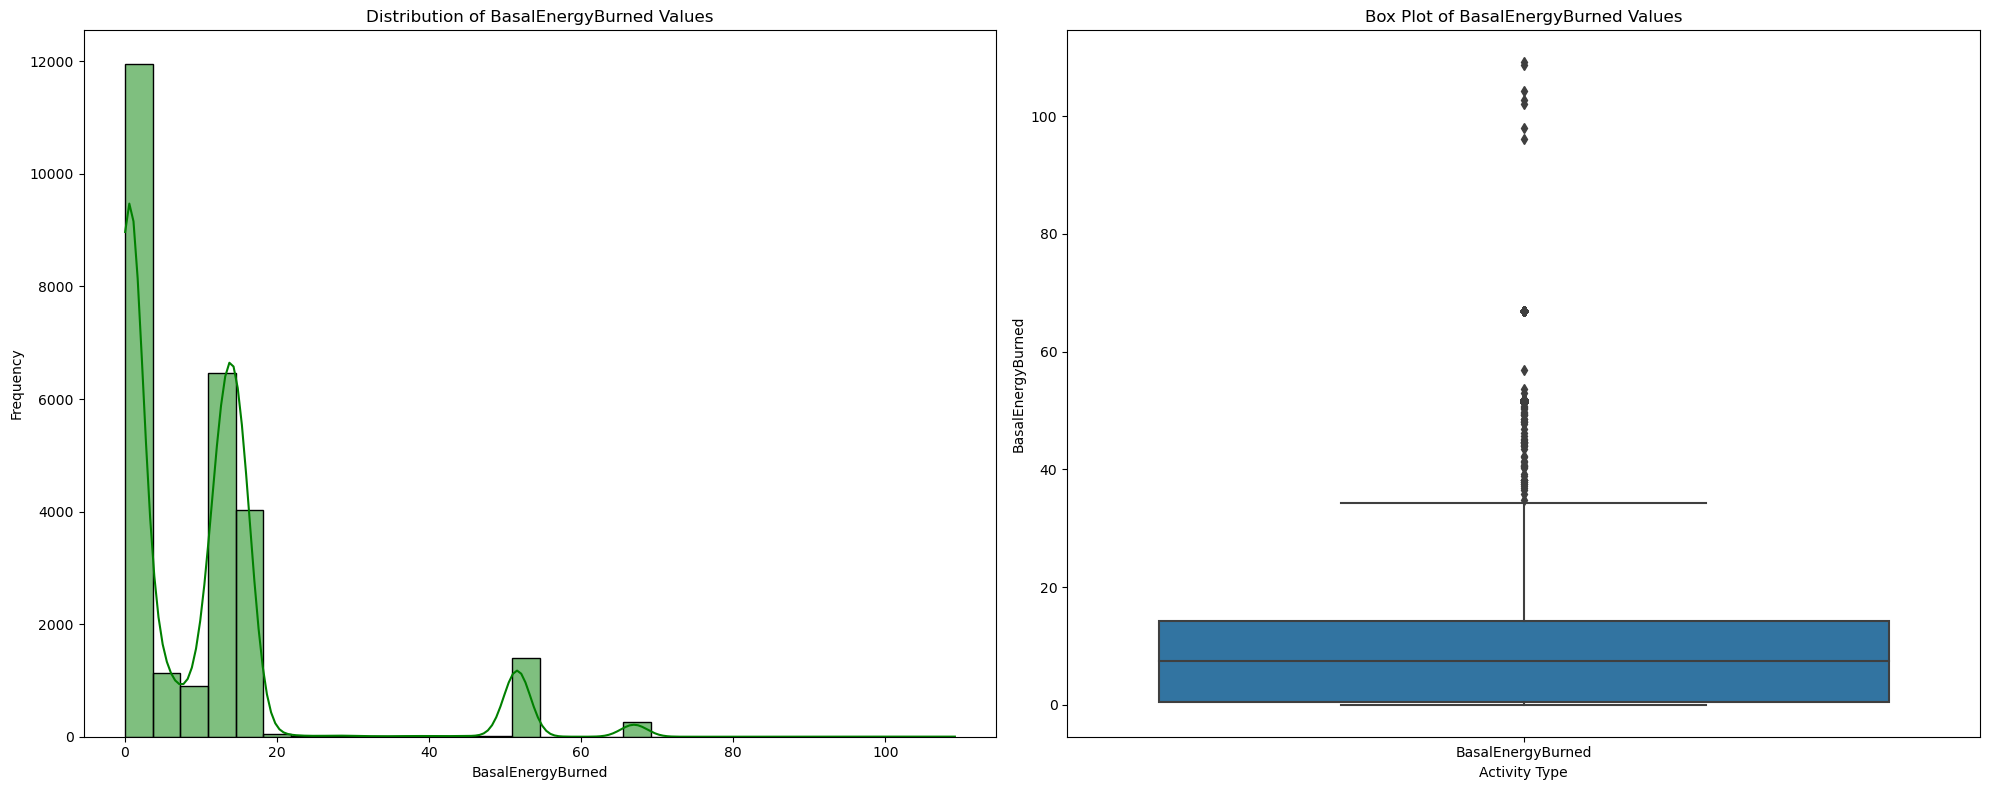

Statistics for BasalEnergyBurned:
count    26291.000000
mean        10.053476
std         13.287188
min          0.046000
25%          0.558000
50%          7.533000
75%         14.169000
max        109.127000
Name: value, dtype: float64


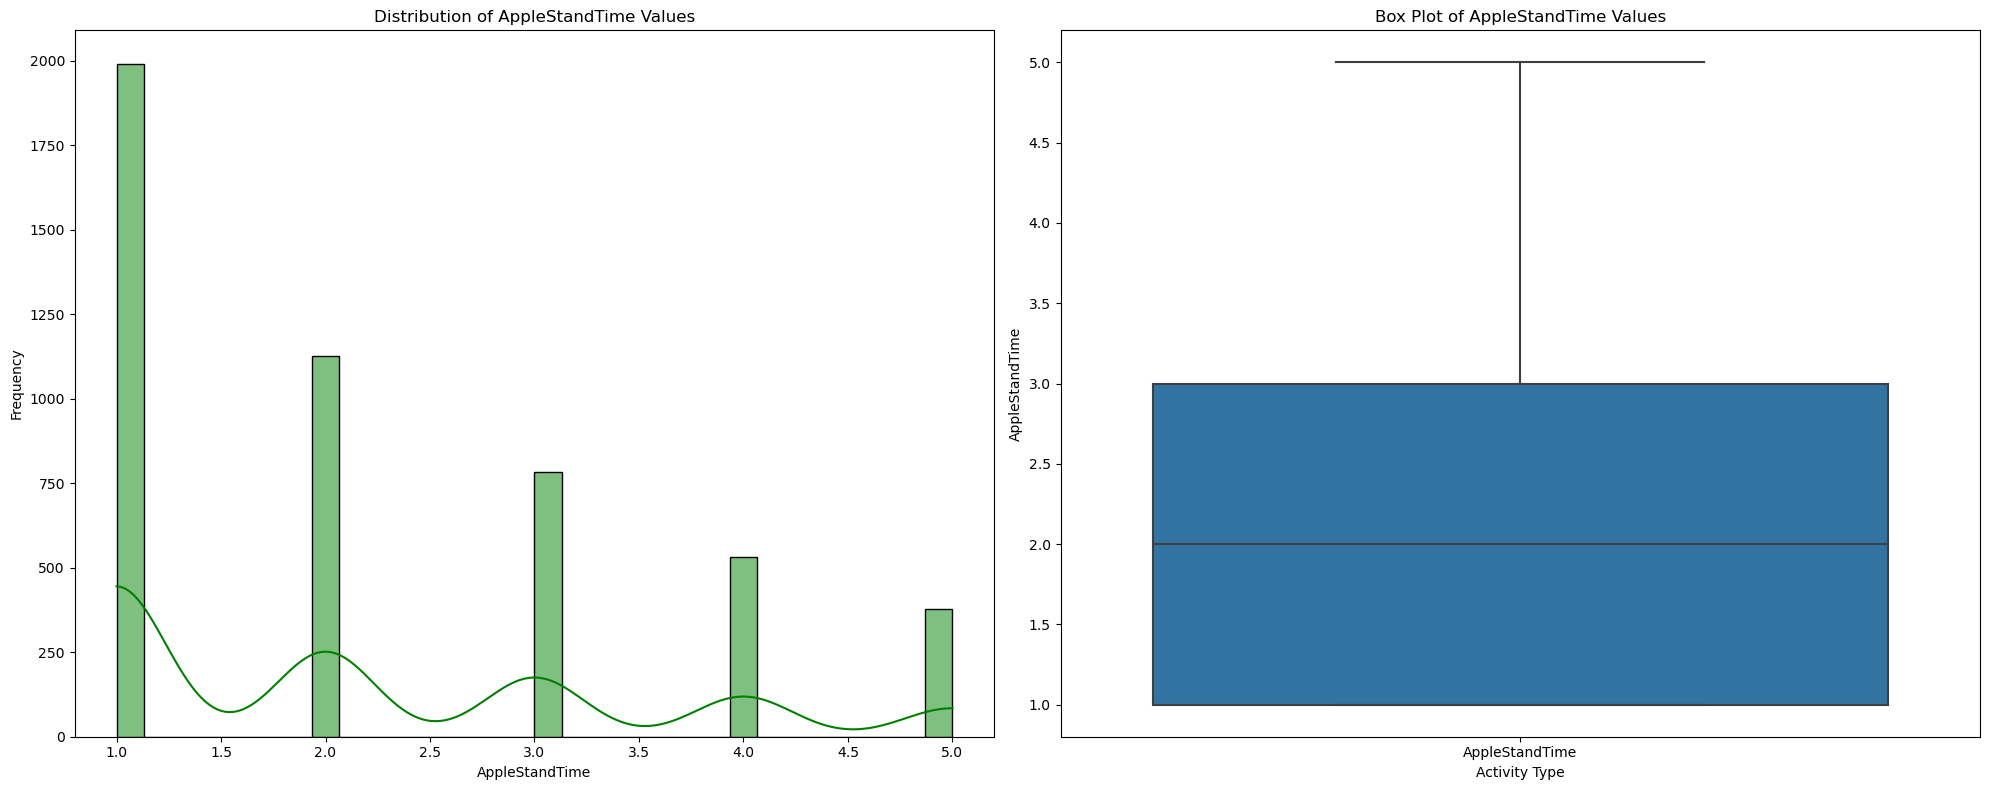

Statistics for AppleStandTime:
count    4810.000000
mean        2.205405
std         1.297266
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: value, dtype: float64


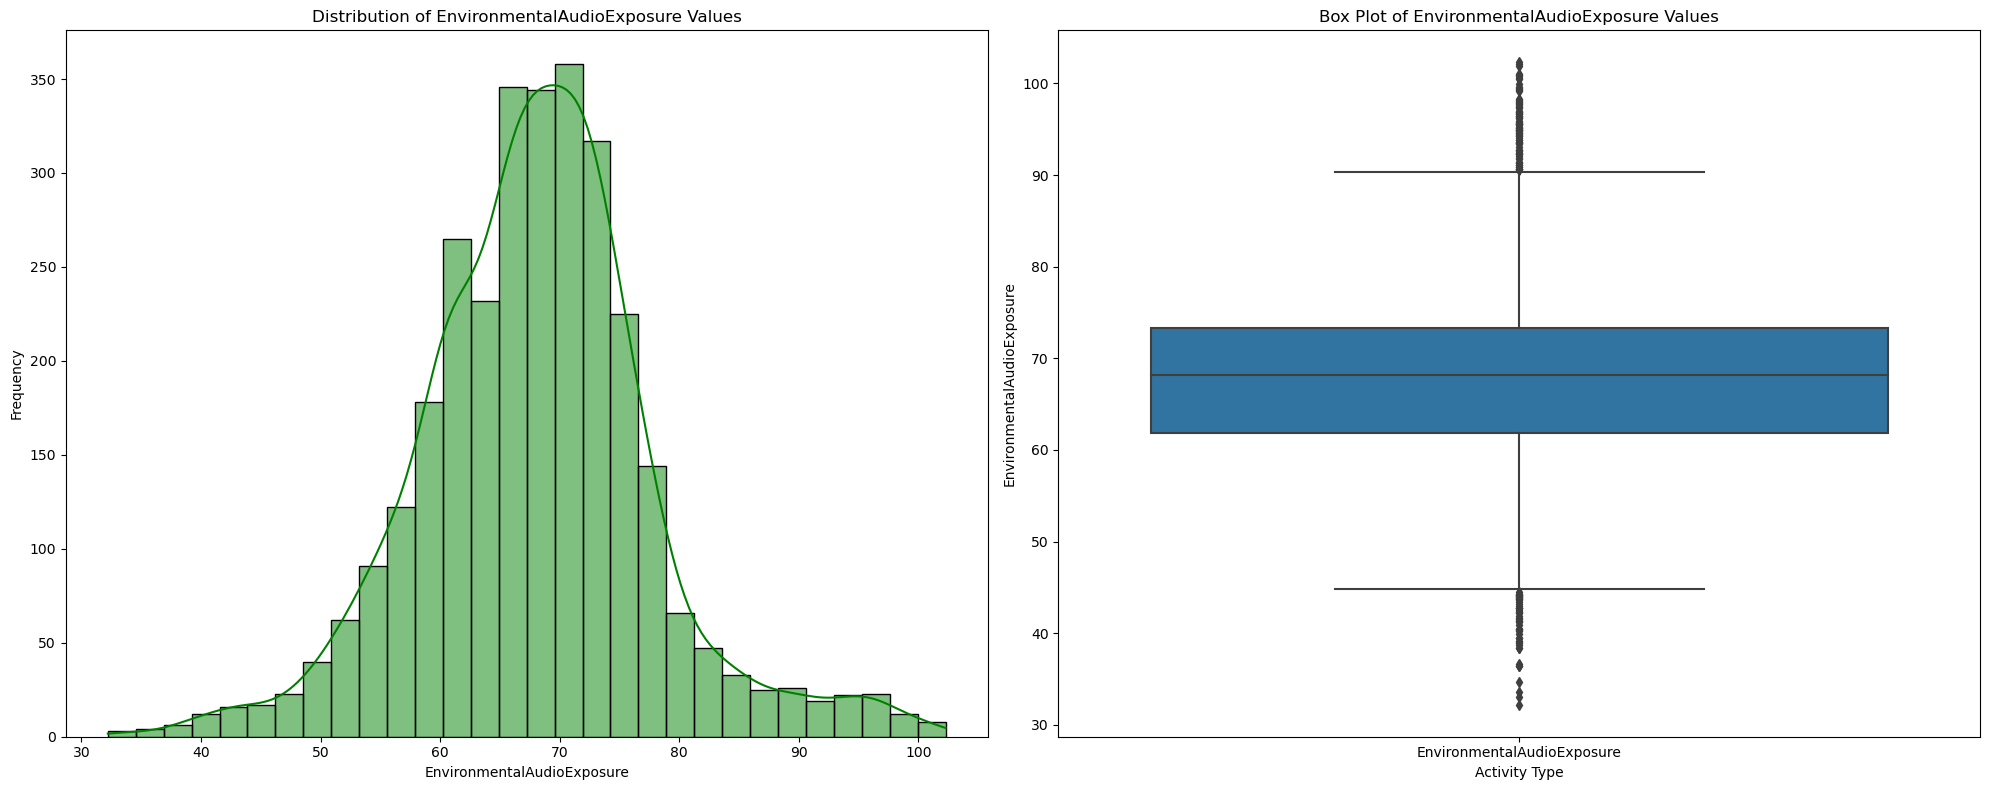

Statistics for EnvironmentalAudioExposure:
count    3086.000000
mean       67.969467
std         9.756687
min        32.204000
25%        61.865025
50%        68.156750
75%        73.270425
max       102.286000
Name: value, dtype: float64


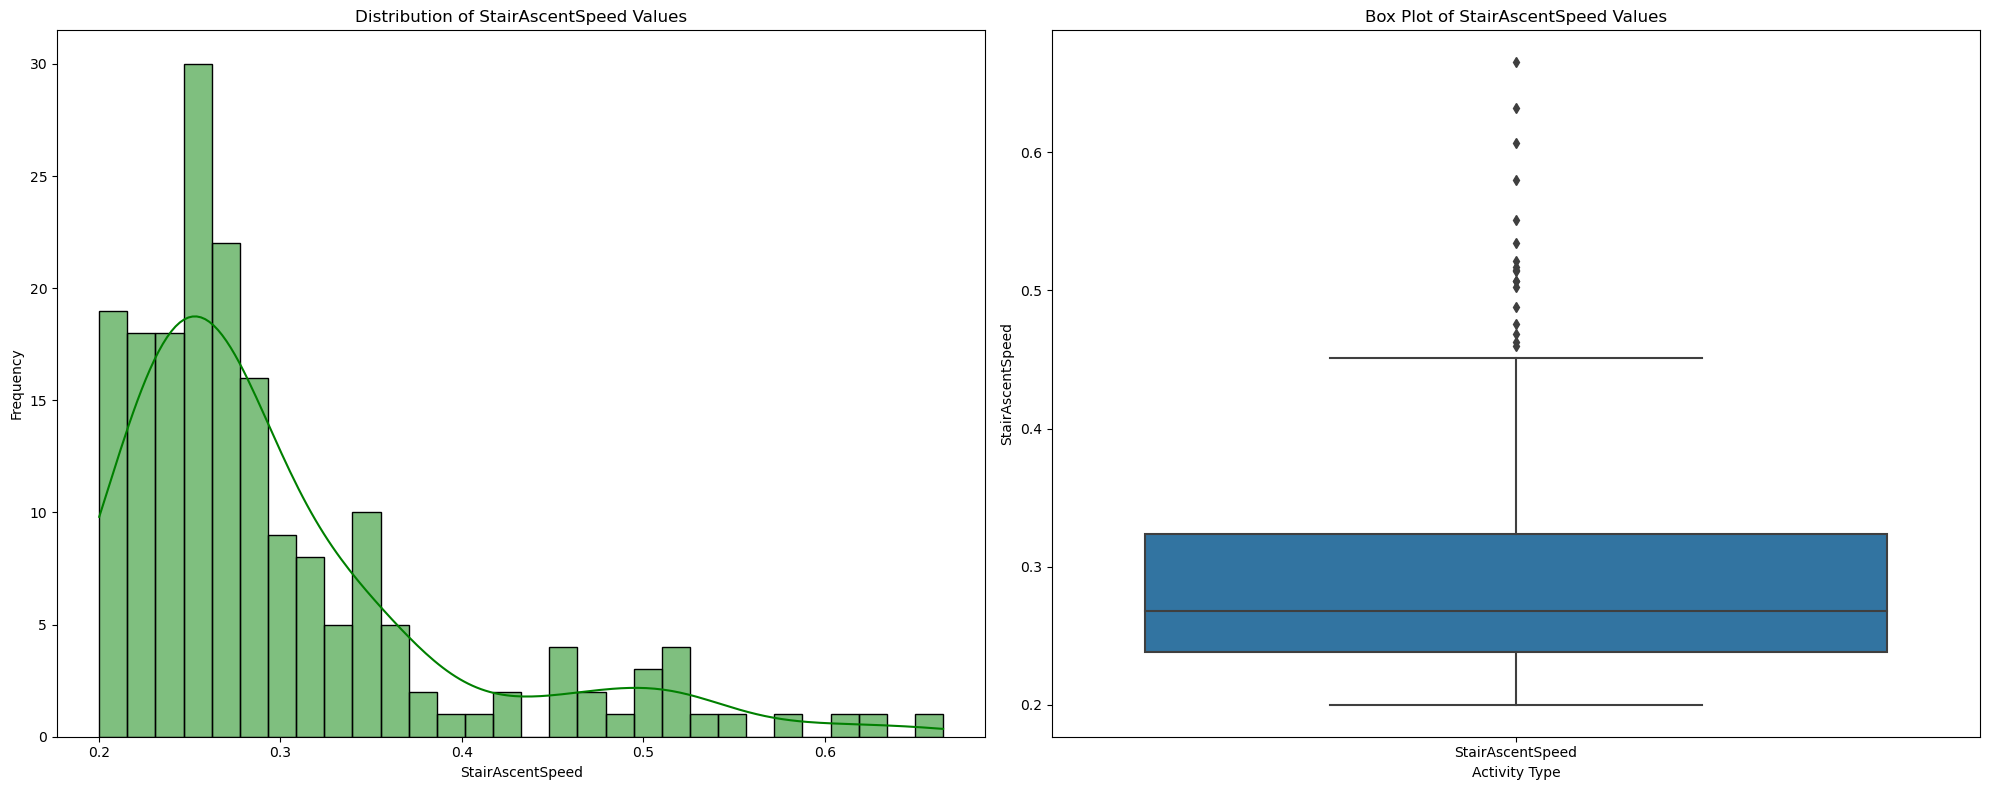

Statistics for StairAscentSpeed:
count    186.000000
mean       0.298272
std        0.092389
min        0.200264
25%        0.238441
50%        0.267754
75%        0.323919
max        0.665057
Name: value, dtype: float64


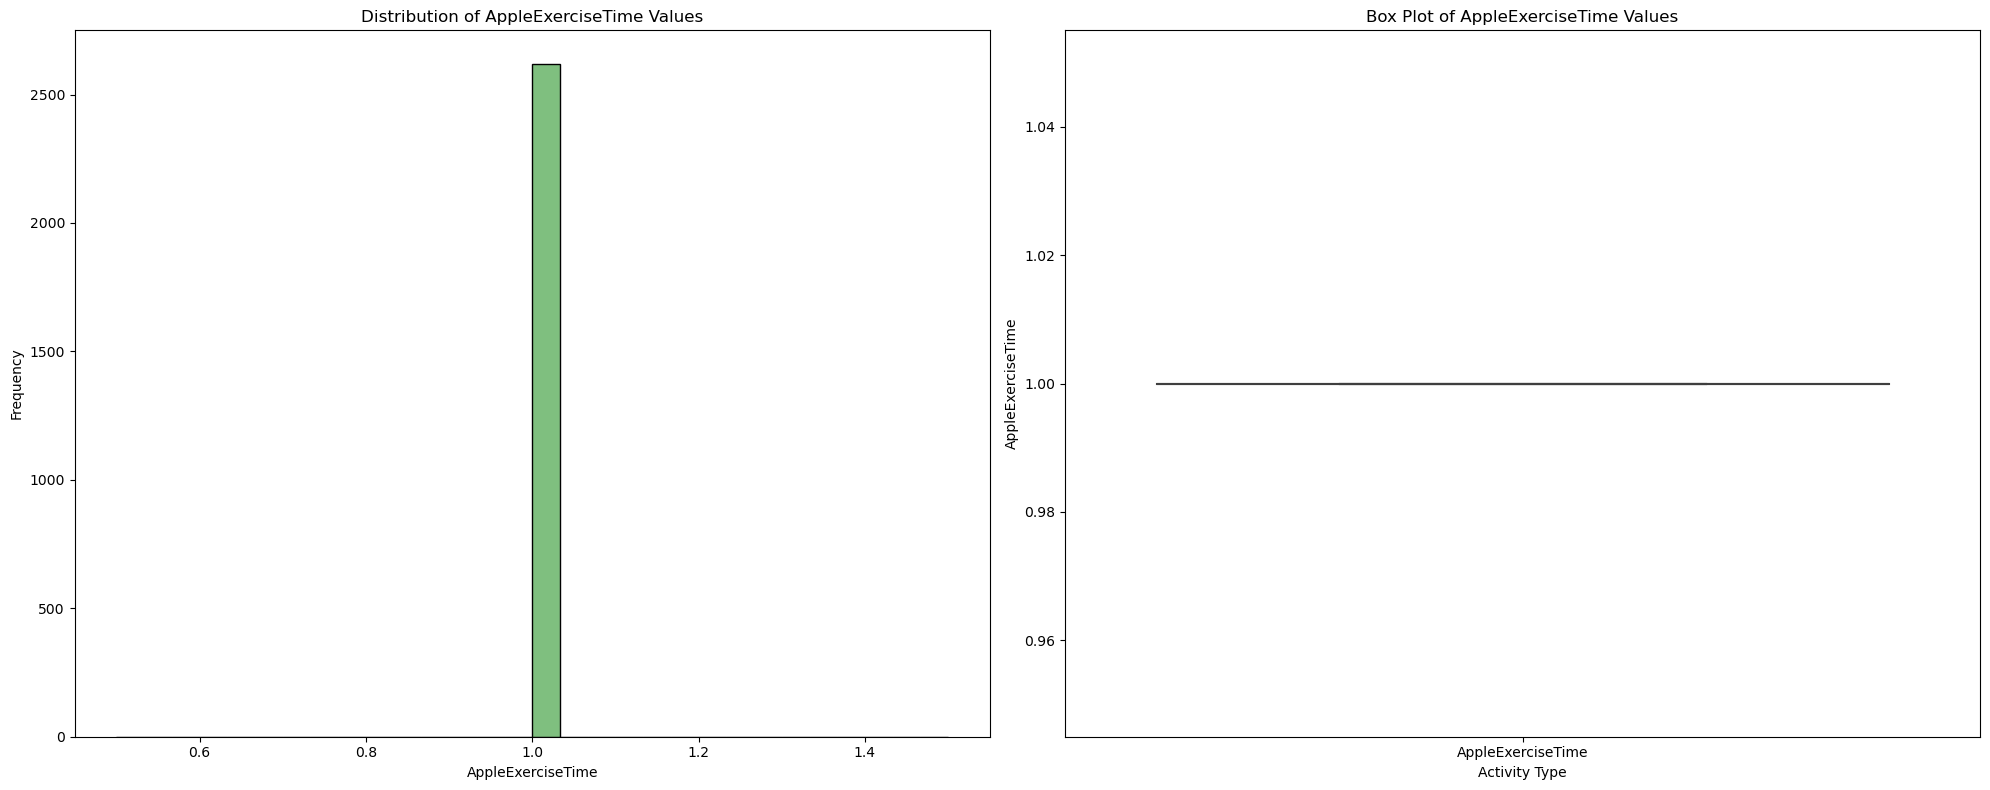

Statistics for AppleExerciseTime:
count    2619.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: value, dtype: float64


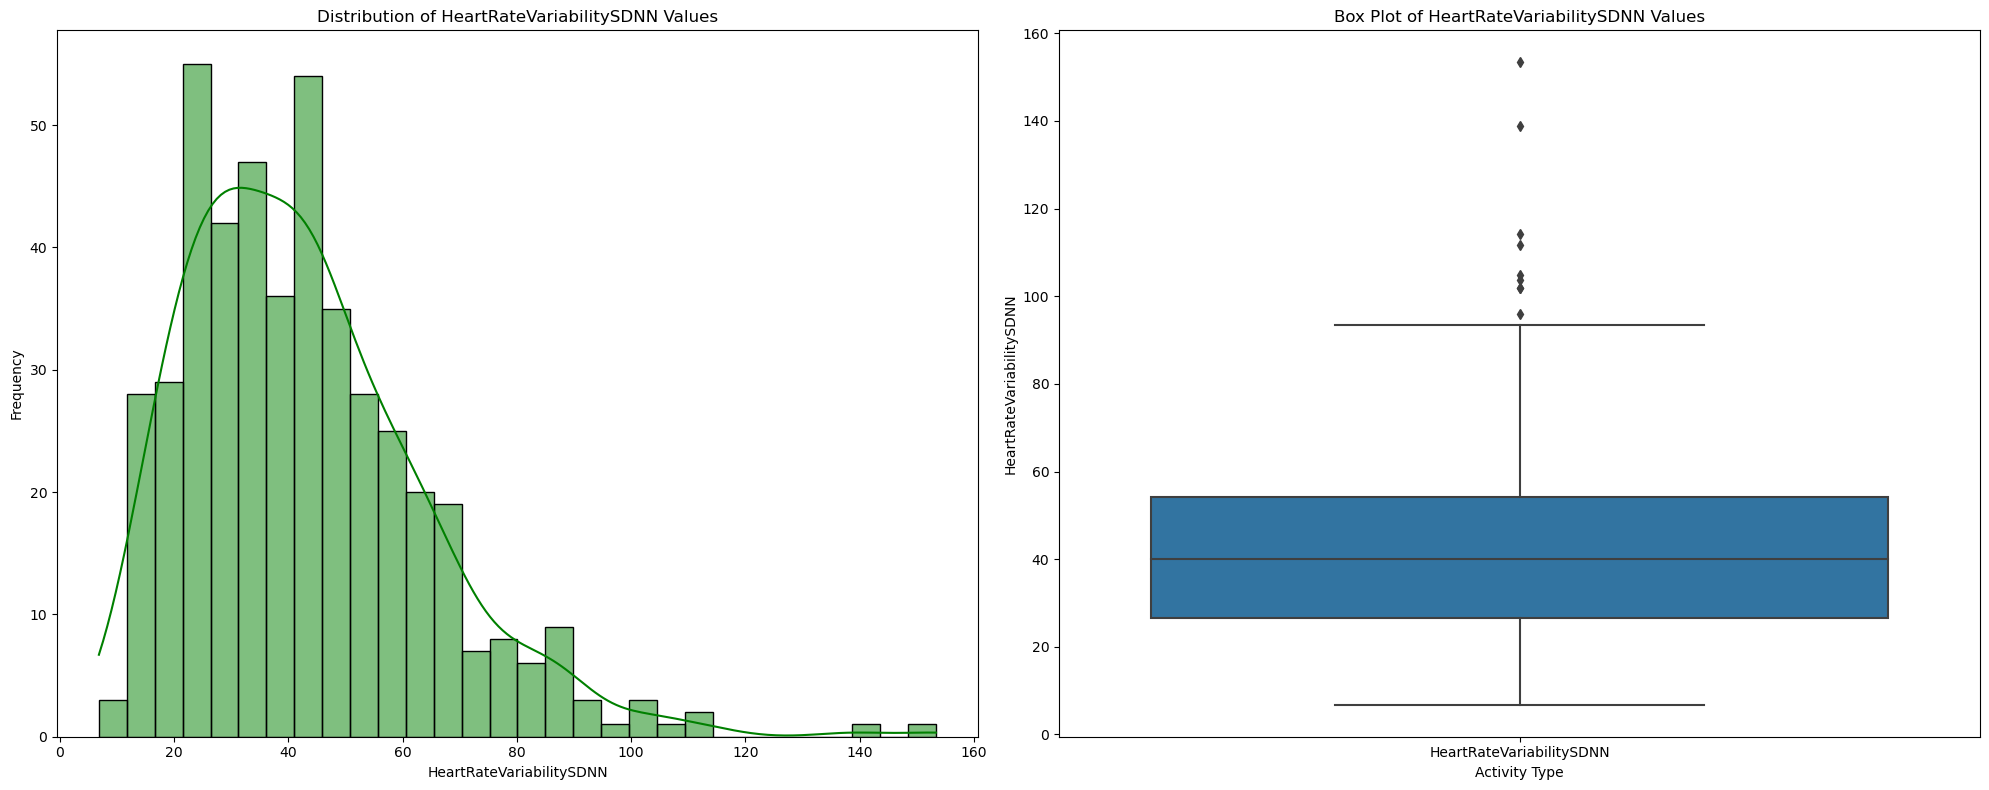

Statistics for HeartRateVariabilitySDNN:
count    463.000000
mean      42.634190
std       20.953747
min        6.807230
25%       26.683650
50%       39.934400
75%       54.282250
max      153.357000
Name: value, dtype: float64


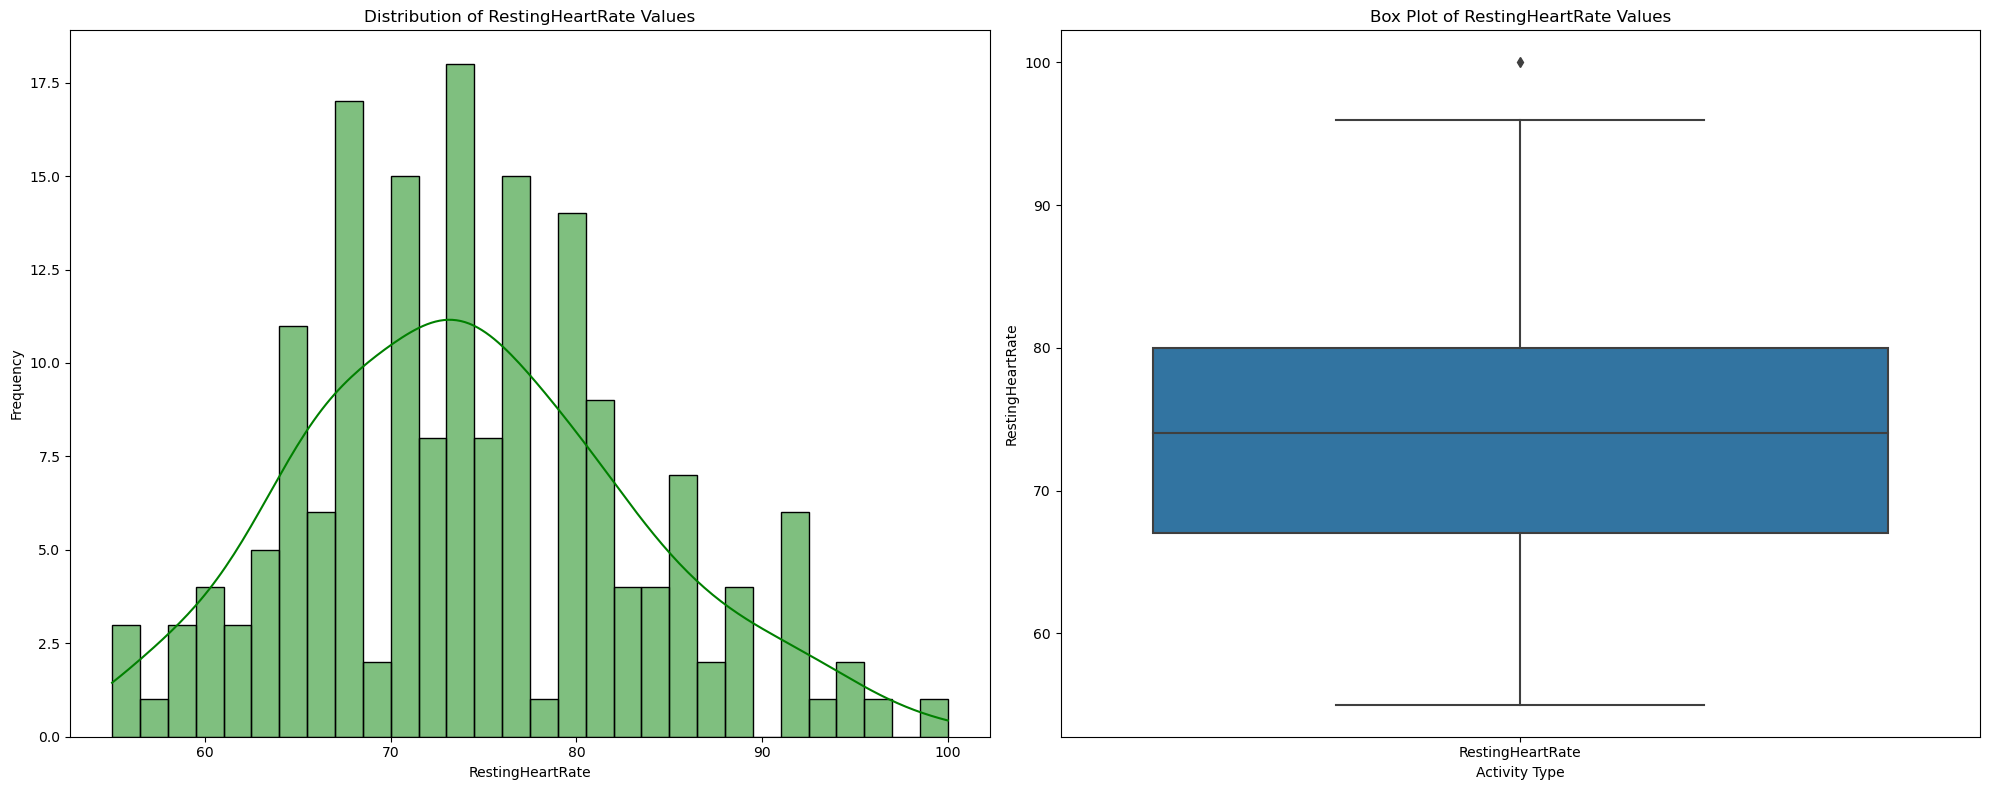

Statistics for RestingHeartRate:
count    175.000000
mean      74.142857
std        9.046949
min       55.000000
25%       67.000000
50%       74.000000
75%       80.000000
max      100.000000
Name: value, dtype: float64


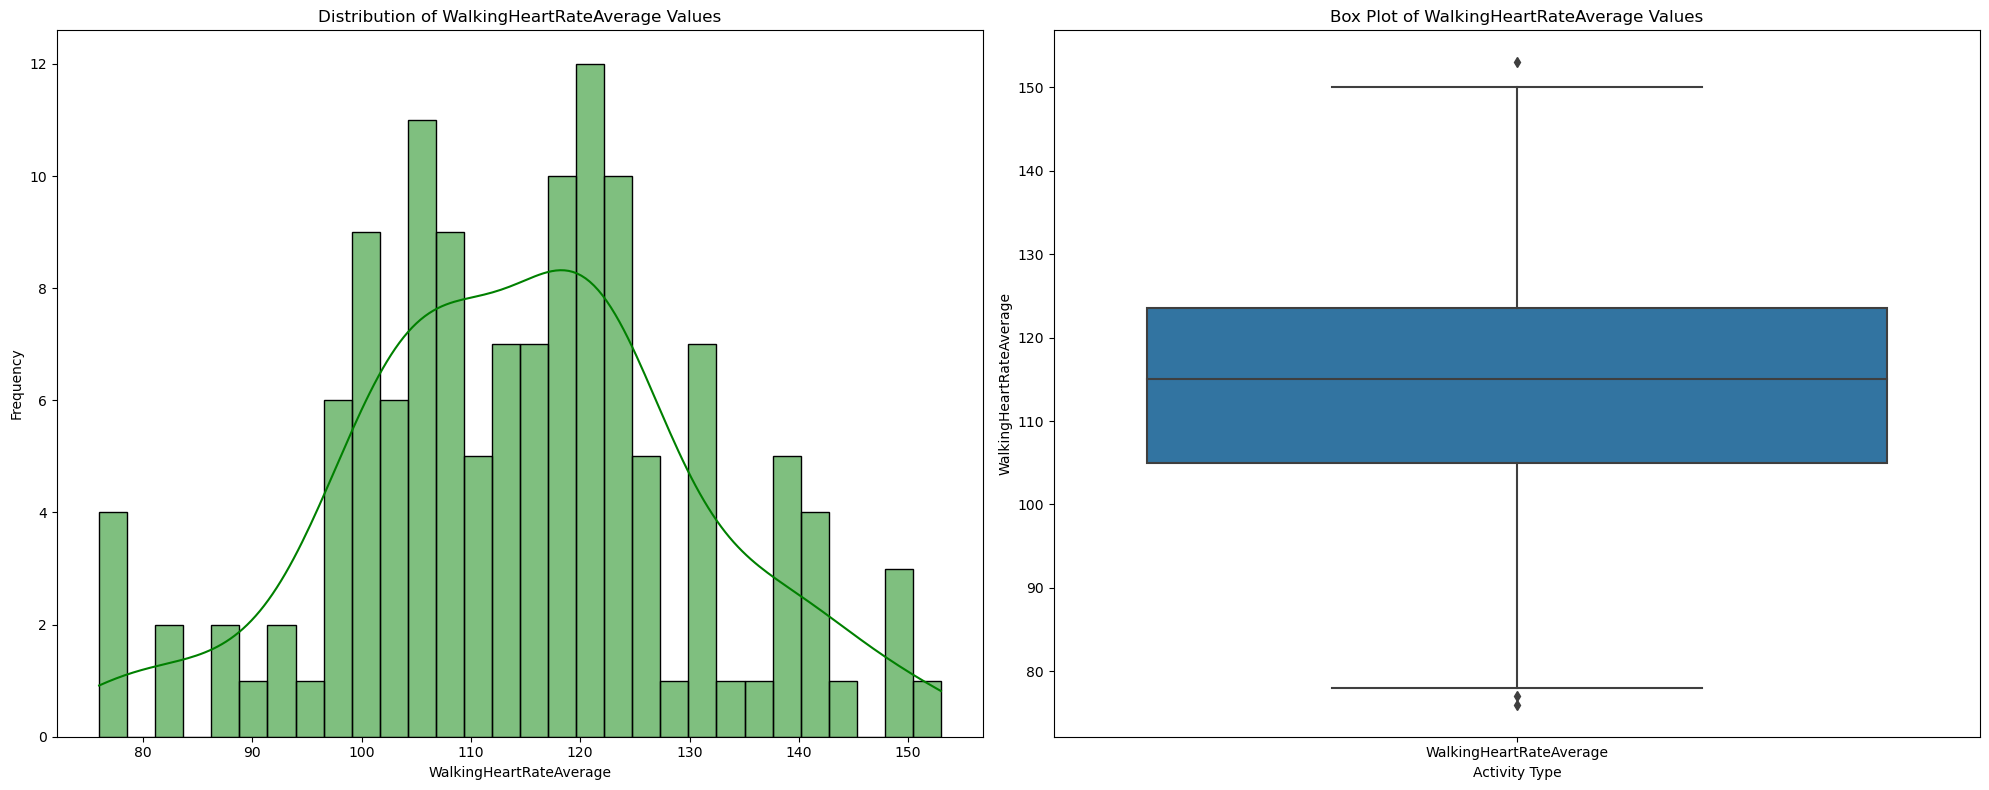

Statistics for WalkingHeartRateAverage:
count    133.000000
mean     114.639098
std       15.870016
min       76.000000
25%      105.000000
50%      115.000000
75%      123.500000
max      153.000000
Name: value, dtype: float64


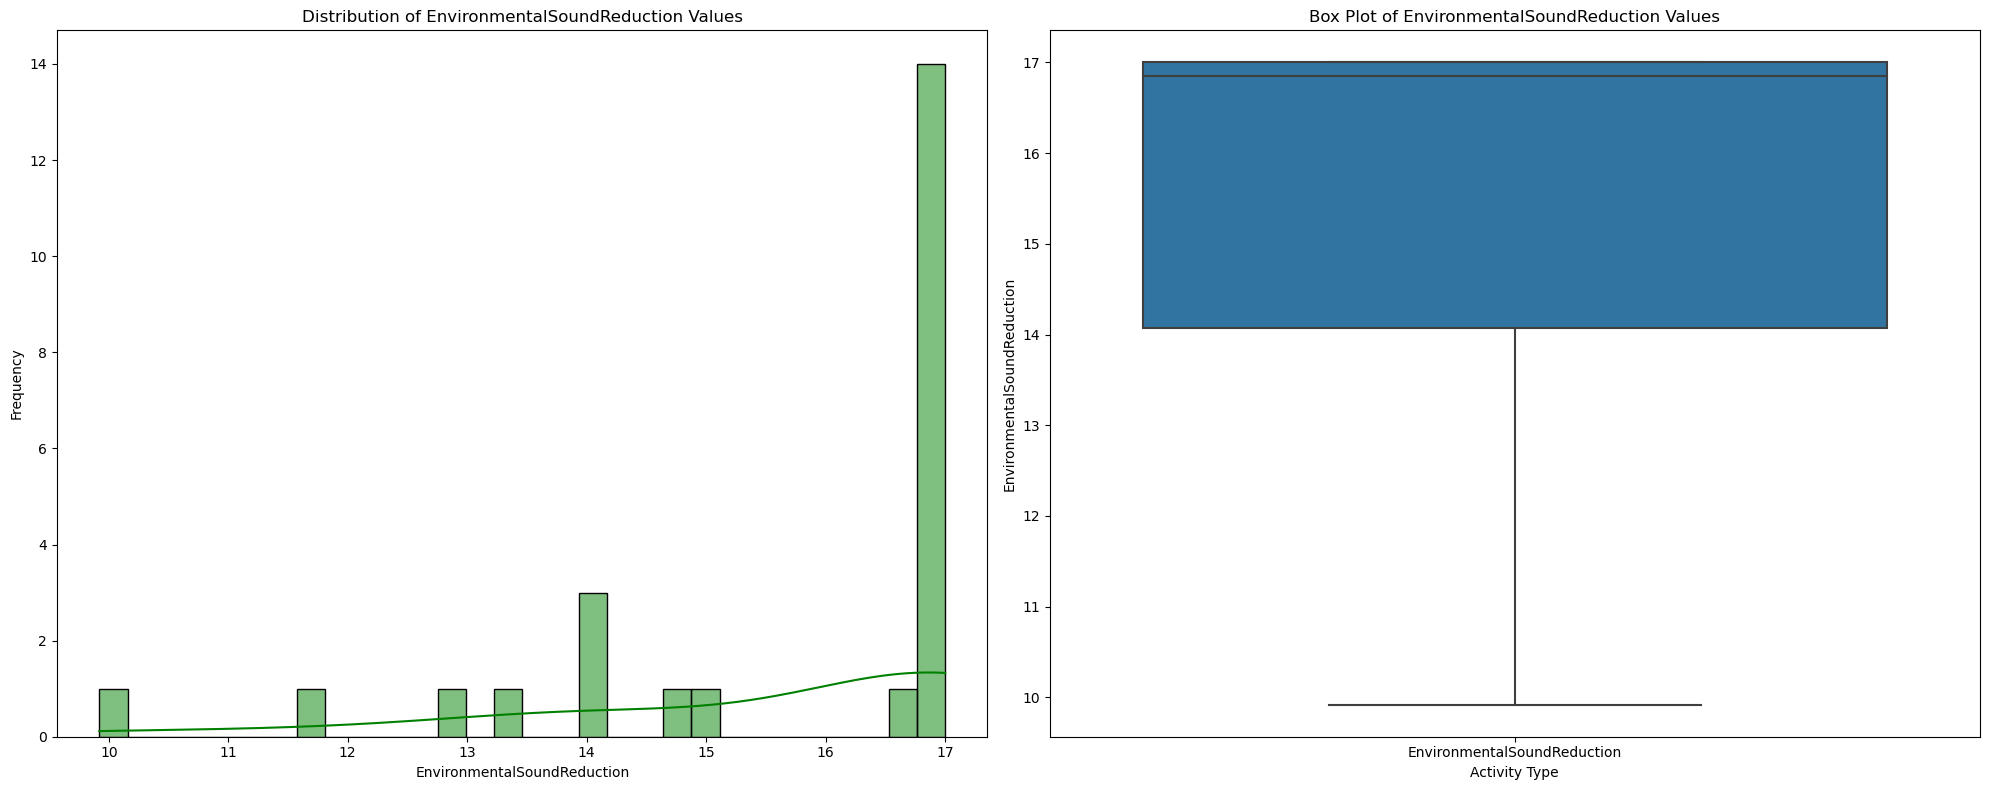

Statistics for EnvironmentalSoundReduction:
count    24.000000
mean     15.564653
std       2.048791
min       9.920280
25%      14.075500
50%      16.851500
75%      17.000000
max      17.000000
Name: value, dtype: float64


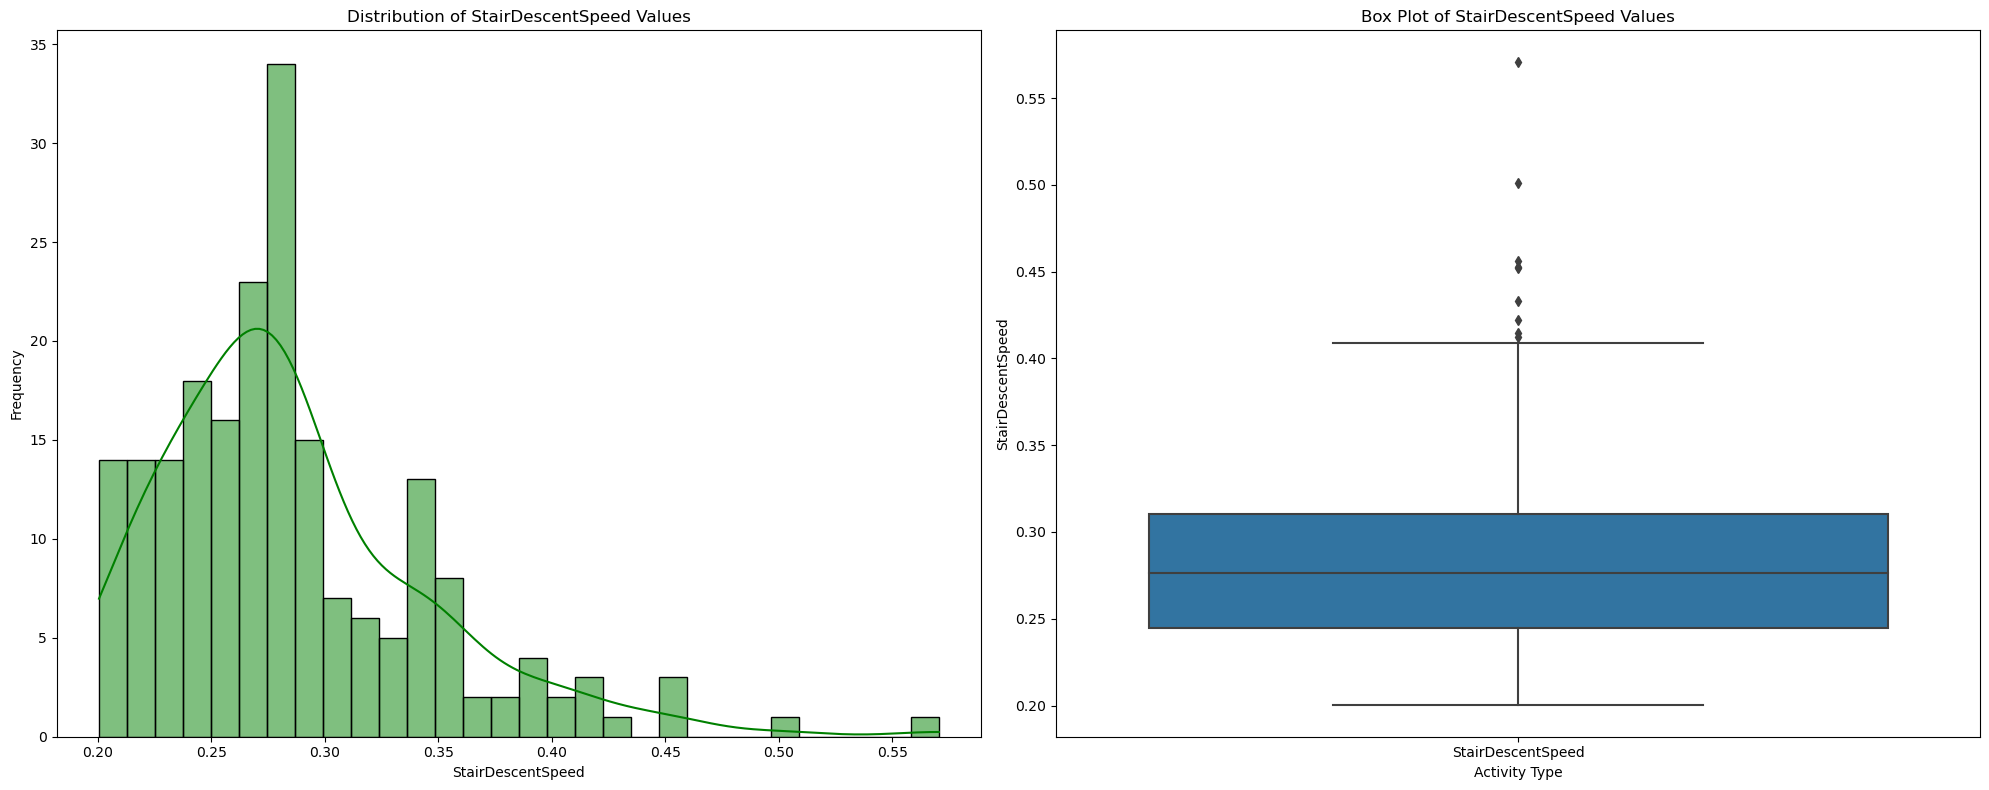

Statistics for StairDescentSpeed:
count    206.000000
mean       0.285394
std        0.059933
min        0.200535
25%        0.244437
50%        0.276542
75%        0.310416
max        0.570533
Name: value, dtype: float64


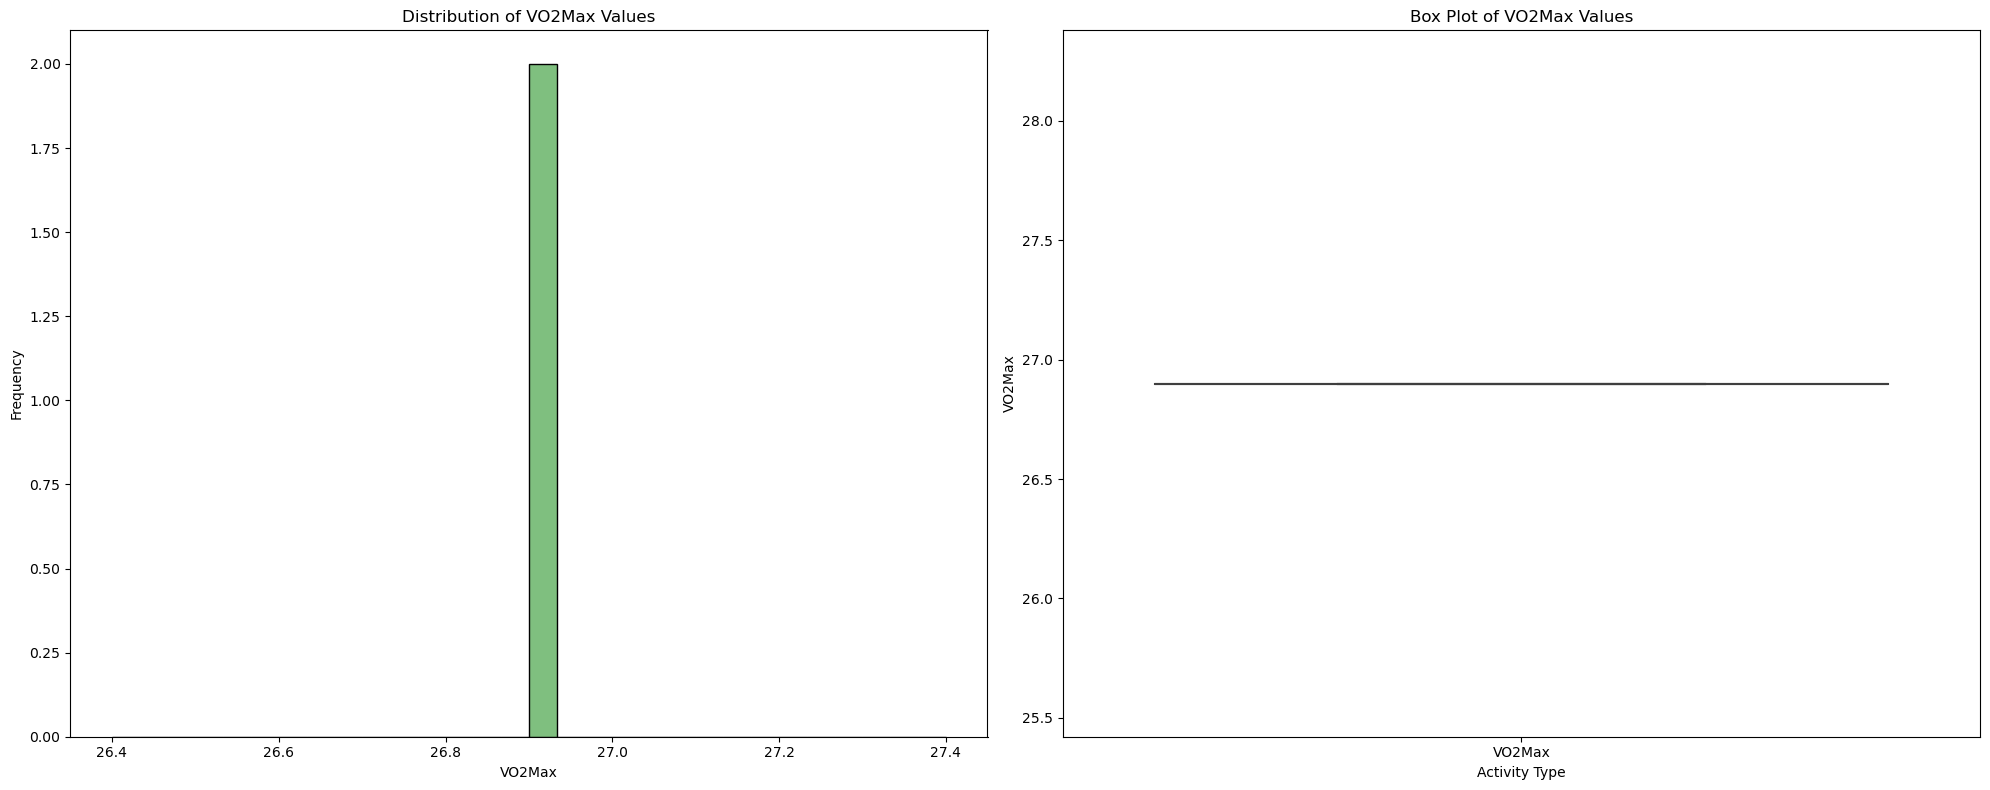

Statistics for VO2Max:
count     2.0
mean     26.9
std       0.0
min      26.9
25%      26.9
50%      26.9
75%      26.9
max      26.9
Name: value, dtype: float64


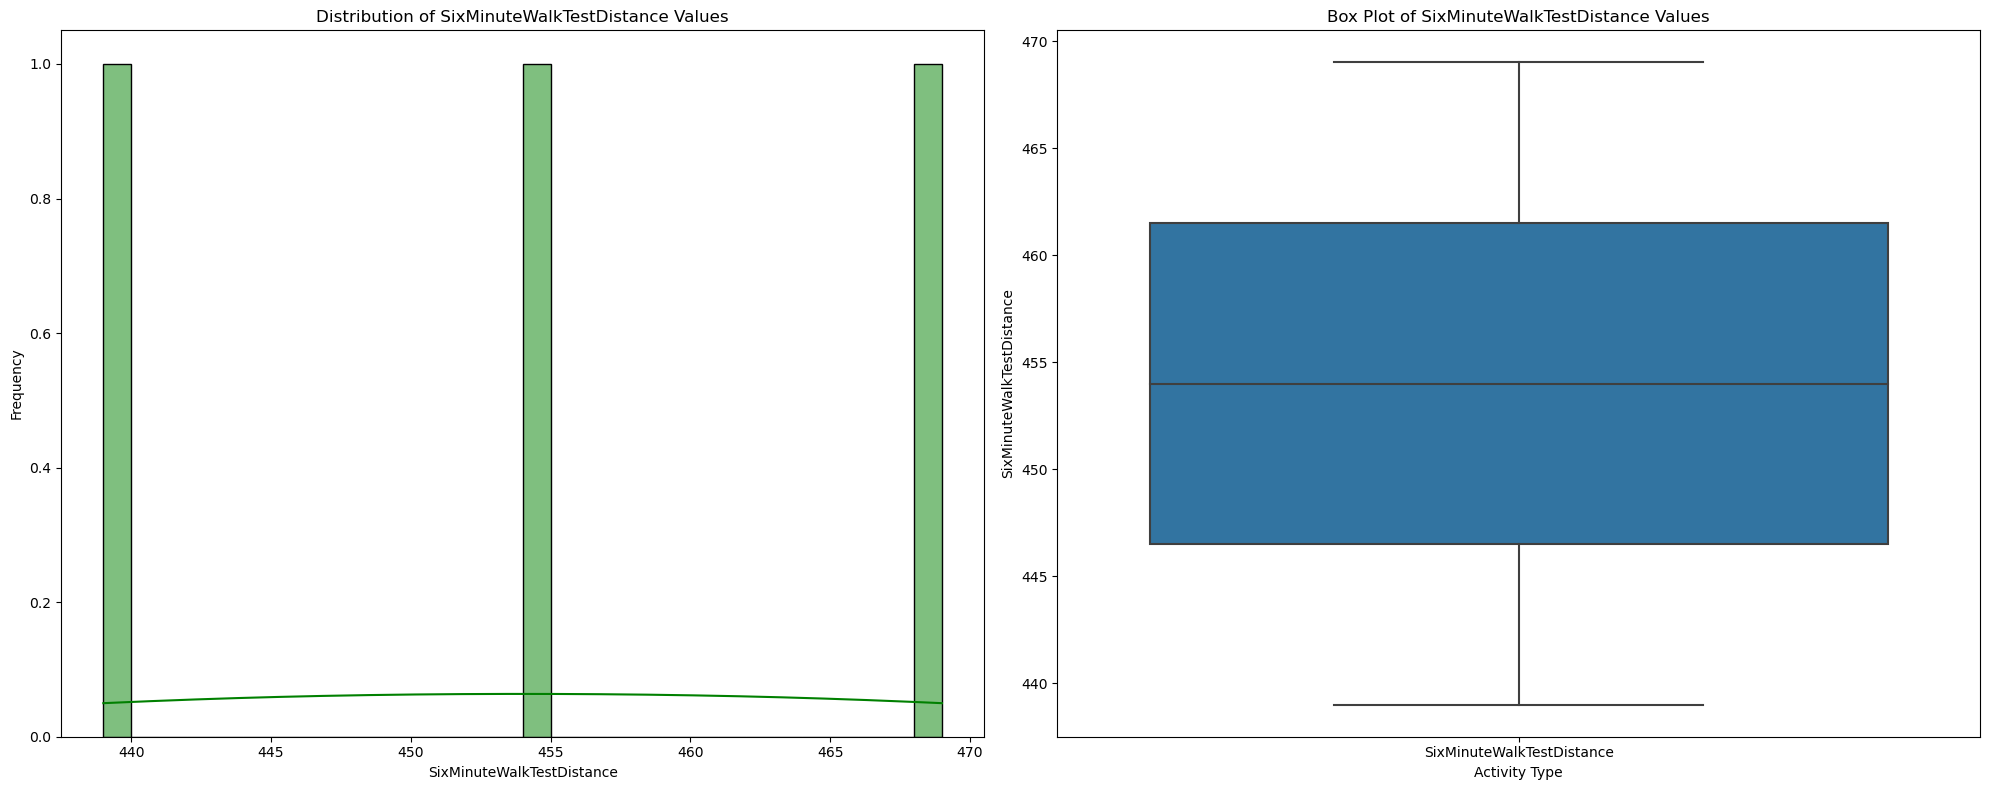

Statistics for SixMinuteWalkTestDistance:
count      3.0
mean     454.0
std       15.0
min      439.0
25%      446.5
50%      454.0
75%      461.5
max      469.0
Name: value, dtype: float64


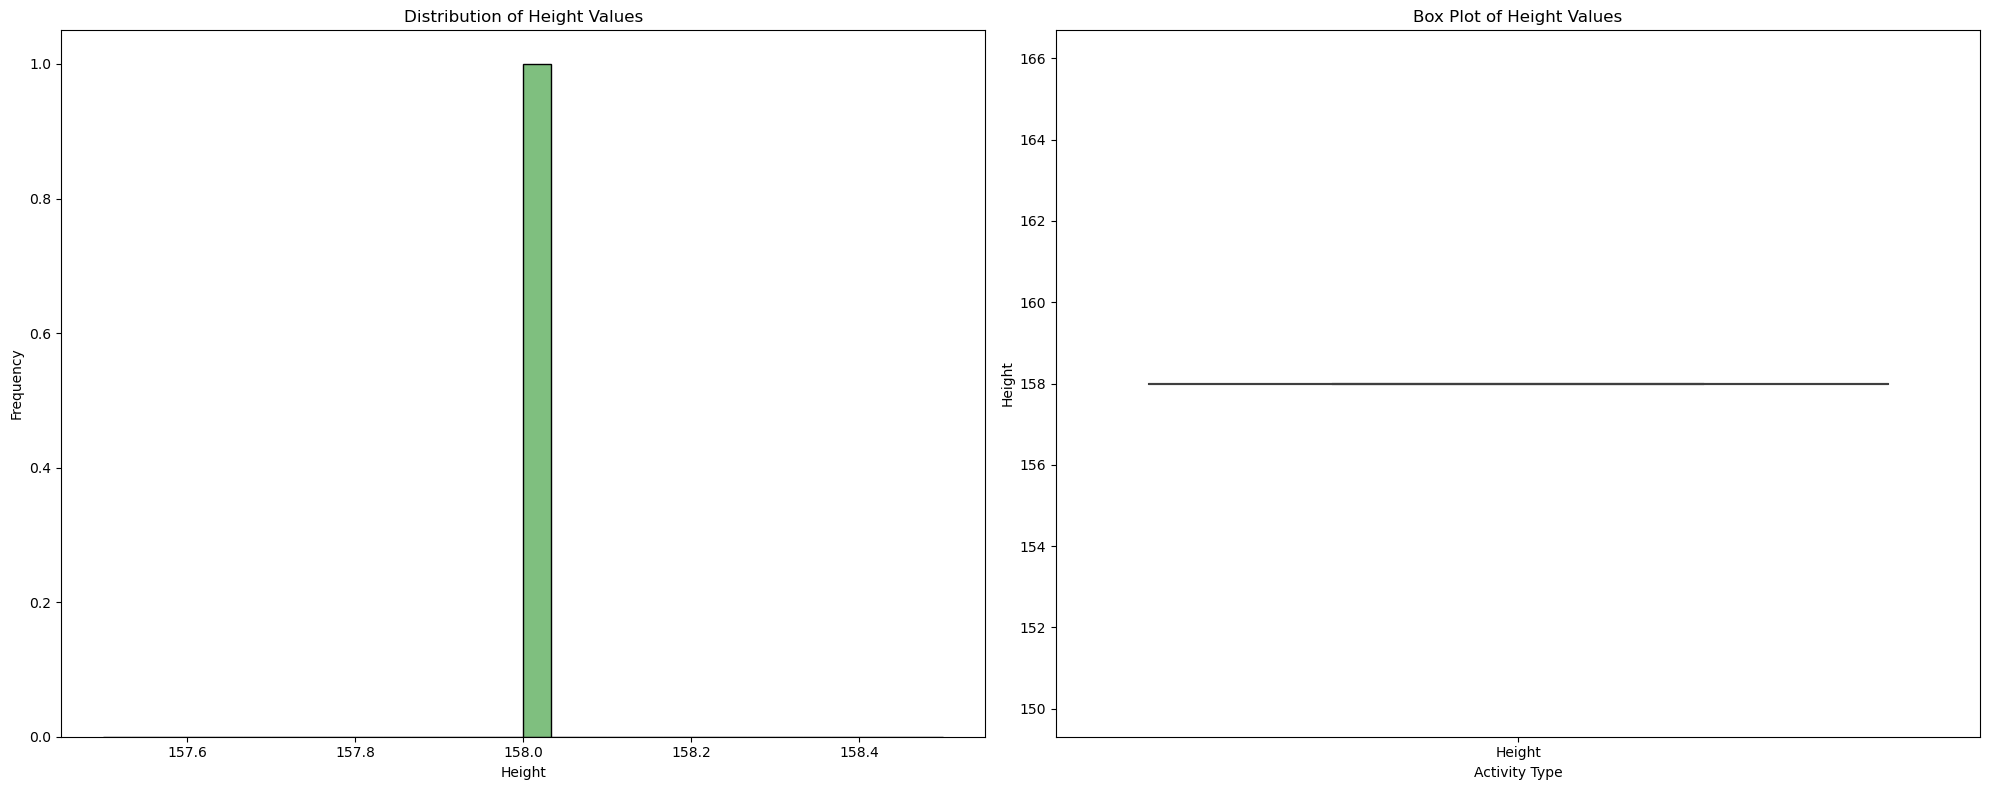

Statistics for Height:
count      1.0
mean     158.0
std        NaN
min      158.0
25%      158.0
50%      158.0
75%      158.0
max      158.0
Name: value, dtype: float64


In [7]:
# %%
def analyze_activity_distribution(activity_type, df):
    activity_df = df[df['type'] == activity_type]
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    
    sns.histplot(activity_df['value'], bins=30, kde=True, color='g', ax=ax1)
    ax1.set_title(f'Distribution of {activity_type} Values')
    ax1.set_xlabel(activity_type)
    ax1.set_ylabel('Frequency')
    
    sns.boxplot(x='type', y='value', data=activity_df, ax=ax2)
    ax2.set_title(f'Box Plot of {activity_type} Values')
    ax2.set_xlabel('Activity Type')
    ax2.set_ylabel(activity_type)
    
    plt.tight_layout()
    plt.show()
    
    print(f'Statistics for {activity_type}:')
    print(activity_df['value'].describe())

# Analyze distribution for each activity type
for activity in df['type'].unique():
    analyze_activity_distribution(activity, df)

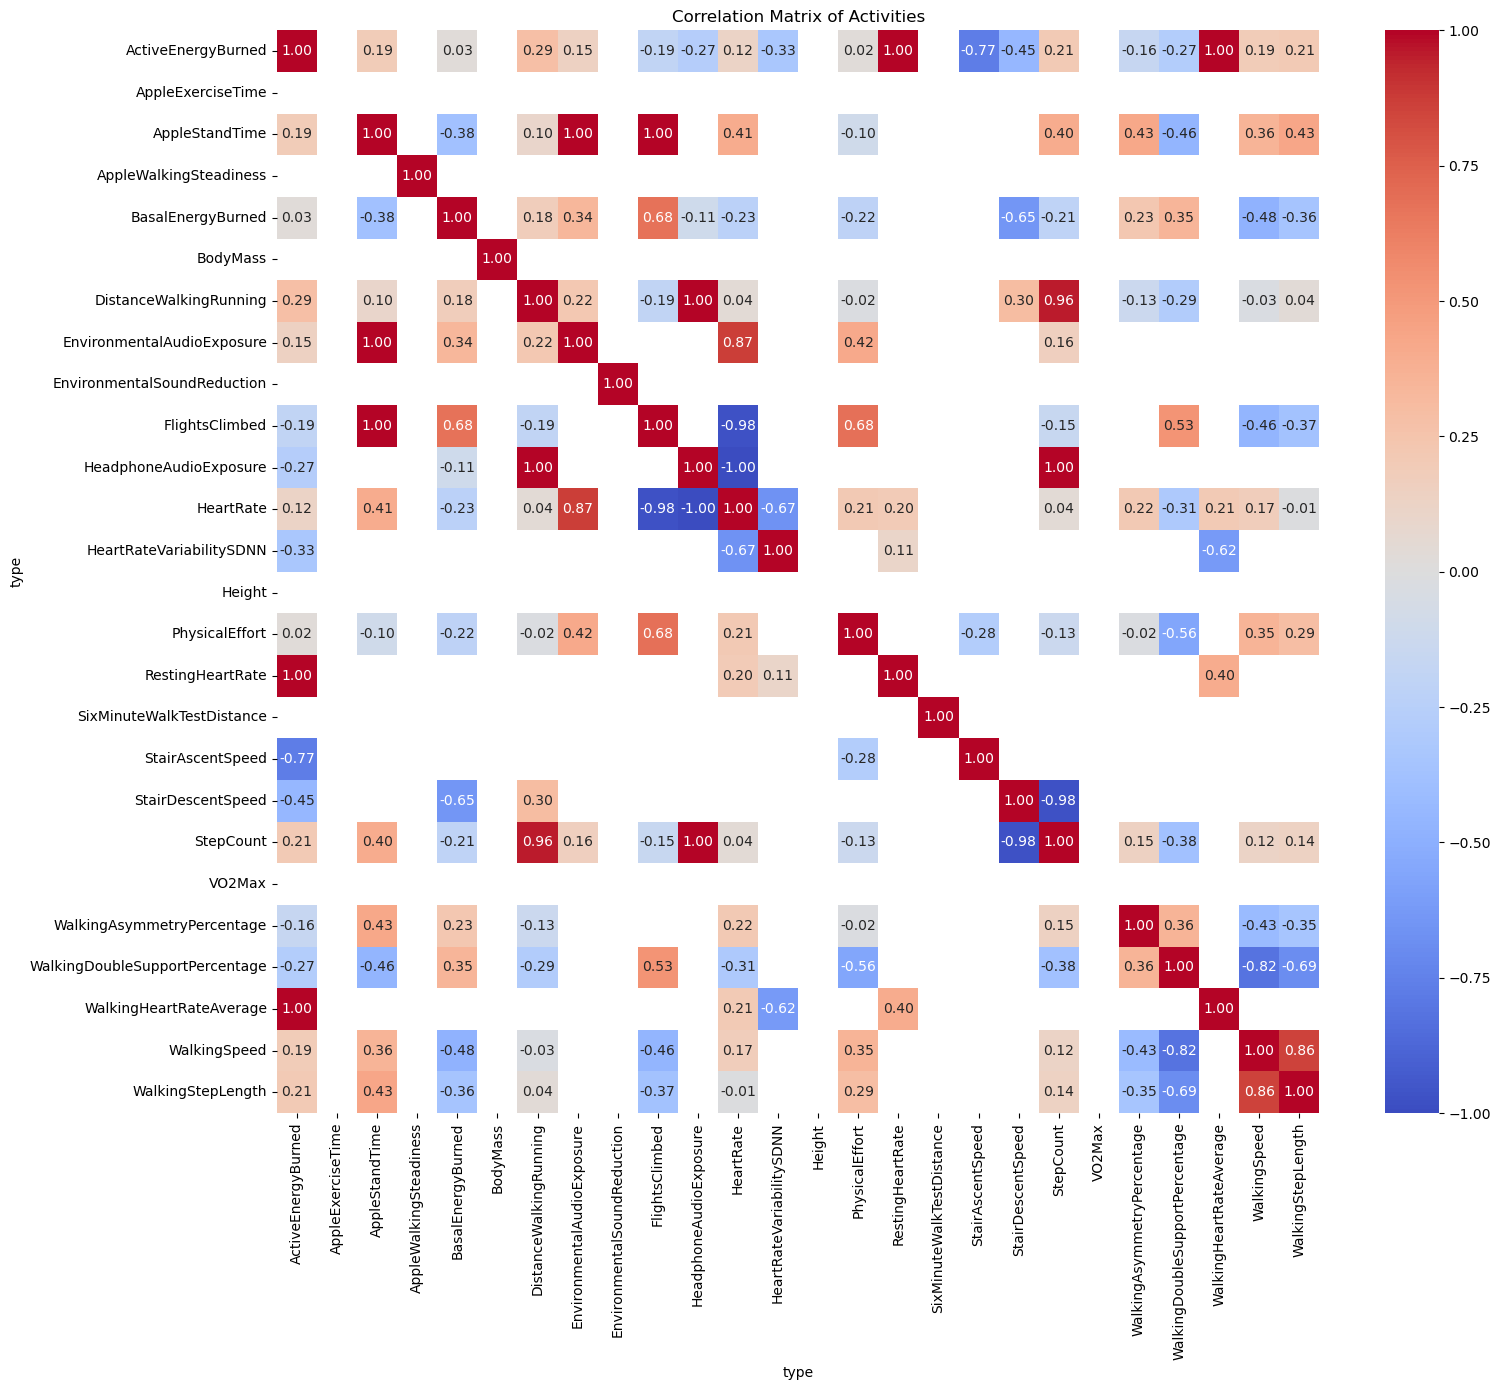


Strong correlations for ActiveEnergyBurned:
  StairAscentSpeed: -0.77

Strong correlations for AppleStandTime:
  EnvironmentalAudioExposure: 1.00

Strong correlations for BasalEnergyBurned:
  FlightsClimbed: 0.68
  StairDescentSpeed: -0.65

Strong correlations for DistanceWalkingRunning:
  StepCount: 0.96

Strong correlations for EnvironmentalAudioExposure:
  AppleStandTime: 1.00
  HeartRate: 0.87

Strong correlations for FlightsClimbed:
  BasalEnergyBurned: 0.68
  HeartRate: -0.98
  PhysicalEffort: 0.68
  WalkingDoubleSupportPercentage: 0.53

Strong correlations for HeadphoneAudioExposure:
  HeartRate: -1.00

Strong correlations for HeartRate:
  EnvironmentalAudioExposure: 0.87
  FlightsClimbed: -0.98
  HeadphoneAudioExposure: -1.00
  HeartRateVariabilitySDNN: -0.67

Strong correlations for HeartRateVariabilitySDNN:
  HeartRate: -0.67
  WalkingHeartRateAverage: -0.62

Strong correlations for PhysicalEffort:
  FlightsClimbed: 0.68
  WalkingDoubleSupportPercentage: -0.56

Strong correl

In [8]:
# ## 4. Correlation Analysis

# %%
def plot_correlation_matrix(df):
    # Create a pivot table, using mean to aggregate
    pivot_df = df.pivot_table(index='startDate', columns='type', values='value', aggfunc='mean')
    
    # Calculate correlation matrix
    correlation_matrix = pivot_df.corr()

    # Plot heatmap
    plt.figure(figsize=(16, 14))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
    plt.title('Correlation Matrix of Activities')
    plt.tight_layout()
    plt.show()

    # Print correlations with absolute value greater than 0.5
    strong_correlations = (correlation_matrix.abs() > 0.5) & (correlation_matrix != 1.0)
    for col in correlation_matrix.columns:
        strong_corr = correlation_matrix.index[strong_correlations[col]].tolist()
        if strong_corr:
            print(f"\nStrong correlations for {col}:")
            for corr_col in strong_corr:
                print(f"  {corr_col}: {correlation_matrix.loc[corr_col, col]:.2f}")

plot_correlation_matrix(df)

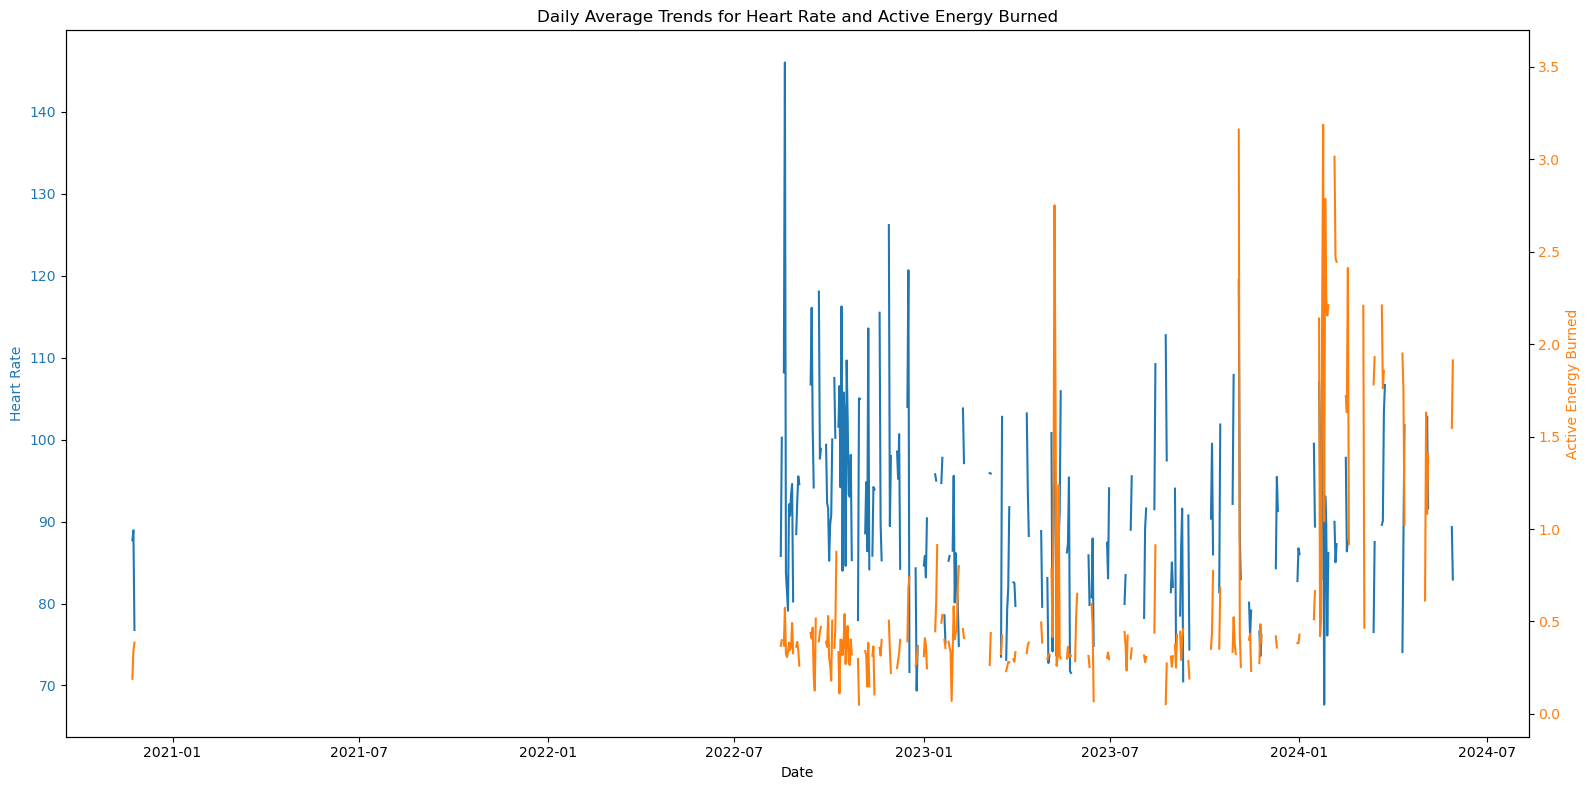

In [9]:
# ## 5. Time Series Analysis

# %%
def plot_time_series(df):
    heart_rate_df = df[df['type'] == 'HeartRate'].set_index('startDate')['value']
    energy_df = df[df['type'] == 'ActiveEnergyBurned'].set_index('startDate')['value']

    # Resample data to daily averages
    heart_rate_daily = heart_rate_df.resample('D').mean()
    energy_daily = energy_df.resample('D').mean()

    fig, ax1 = plt.subplots(figsize=(16, 8))

    ax1.set_xlabel('Date')
    ax1.set_ylabel('Heart Rate', color='tab:blue')
    ax1.plot(heart_rate_daily.index, heart_rate_daily, color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    ax2 = ax1.twinx()
    ax2.set_ylabel('Active Energy Burned', color='tab:orange')
    ax2.plot(energy_daily.index, energy_daily, color='tab:orange')
    ax2.tick_params(axis='y', labelcolor='tab:orange')

    plt.title('Daily Average Trends for Heart Rate and Active Energy Burned')
    fig.tight_layout()
    plt.show()

plot_time_series(df)

In [10]:
# ## 6. Data Aggregation and Normalization

# %%
def aggregate_and_normalize_data(df):
    df['month'] = df['startDate'].dt.month
    df['year'] = df['startDate'].dt.year

    monthly_avg_values = df.groupby(['year', 'month', 'type'])['value'].mean().reset_index()
    
    normalized_values = pd.DataFrame()
    for t in df['type'].unique():
        type_df = monthly_avg_values[monthly_avg_values['type'] == t]
        scaler = StandardScaler()
        type_df['normalized_value'] = scaler.fit_transform(type_df[['value']])
        normalized_values = pd.concat([normalized_values, type_df], ignore_index=True)

    normalized_values['user_number'] = 2
    normalized_values.reset_index(drop=True, inplace=True)
    
    return normalized_values

normalized_data = aggregate_and_normalize_data(df)
print(normalized_data.head())

# Export the normalized data
normalized_data.to_csv('monthly_normalized_average_values.csv', index=False)
print("Data exported to monthly_normalized_average_values.csv")


C:\Users\sgrka\AppData\Local\Temp\ipykernel_14304\373660215.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  type_df['normalized_value'] = scaler.fit_transform(type_df[['value']])
C:\Users\sgrka\AppData\Local\Temp\ipykernel_14304\373660215.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  type_df['normalized_value'] = scaler.fit_transform(type_df[['value']])
C:\Users\sgrka\AppData\Local\Temp\ipykernel_14304\373660215.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

   year  month                        type      value  normalized_value  \
0  2020     11                    BodyMass  50.000000         -1.000000   
1  2024      6                    BodyMass  52.000000          1.000000   
2  2020      9  WalkingAsymmetryPercentage   0.010000         -0.556712   
3  2020     10  WalkingAsymmetryPercentage   0.039744         -0.186348   
4  2020     11  WalkingAsymmetryPercentage   0.045146         -0.119082   

   user_number  
0            2  
1            2  
2            2  
3            2  
4            2  
Data exported to monthly_normalized_average_values.csv


In [11]:
# ## 7. Calculating Advanced Health Indices

# %%
def calculate_health_indices(df):
    pivot_df = df.pivot_table(index=['year', 'month'], columns='type', values='normalized_value', fill_value=0)
    
    window_size = 3  # Reduced window size due to monthly data
    for col in pivot_df.columns:
        pivot_df[f'{col}_MA'] = pivot_df[col].rolling(window=window_size, min_periods=1).mean()
        pivot_df[f'{col}_deviation'] = pivot_df[col] - pivot_df[f'{col}_MA']
        pivot_df[f'{col}_deviation_average'] = pivot_df[f'{col}_deviation'].rolling(window=window_size, min_periods=1).mean()

    # Calculate advanced health indices
    pivot_df['PhysicalActivityIndex'] = pivot_df[['ActiveEnergyBurned_deviation_average', 'StepCount_deviation_average', 
                                                  'DistanceWalkingRunning_deviation_average', 'AppleExerciseTime_deviation_average', 
                                                  'FlightsClimbed_deviation_average']].mean(axis=1)

    pivot_df['CardiovascularFitnessIndex'] = pivot_df[['VO2Max_deviation_average', 'HeartRateVariabilitySDNN_deviation_average']].mean(axis=1) - \
                                             pivot_df[['RestingHeartRate_deviation_average', 'WalkingHeartRateAverage_deviation_average']].mean(axis=1)

    pivot_df['MobilityAndBalanceIndex'] = pivot_df[['WalkingSpeed_deviation_average', 'WalkingStepLength_deviation_average']].mean(axis=1) - \
                                          pivot_df[['WalkingAsymmetryPercentage_deviation_average', 'WalkingDoubleSupportPercentage_deviation_average']].mean(axis=1)

    pivot_df['SedentaryBehaviorIndex'] = pivot_df[['AppleStandTime_deviation_average', 'StepCount_deviation_average']].mean(axis=1)

    pivot_df['EnvironmentalStressIndex'] = pivot_df['EnvironmentalAudioExposure_deviation_average'] - \
                                           pivot_df['EnvironmentalSoundReduction_deviation_average']

    return pivot_df.reset_index()

final_df = calculate_health_indices(normalized_data)
print(final_df.head())

# Export the final data with advanced health indices
final_df.to_csv('advanced_derived_variables.csv', index=False)
print("Data exported to advanced_derived_variables.csv")


type  year  month  ActiveEnergyBurned  AppleExerciseTime  AppleStandTime  \
0     2020      1                 0.0                  0             0.0   
1     2020      2                 0.0                  0             0.0   
2     2020      3                 0.0                  0             0.0   
3     2020      4                 0.0                  0             0.0   
4     2020      5                 0.0                  0             0.0   

type  AppleWalkingSteadiness  BasalEnergyBurned  BodyMass  \
0                        0.0                0.0         0   
1                        0.0                0.0         0   
2                        0.0                0.0         0   
3                        0.0                0.0         0   
4                        0.0                0.0         0   

type  DistanceWalkingRunning  EnvironmentalAudioExposure  ...  \
0                   0.423417                         0.0  ...   
1                   0.837769                  

In [12]:
# ## 8. Summarizing Results

# %%
def summarize_health_indices(df):
    derived_variables = [
        'PhysicalActivityIndex', 'CardiovascularFitnessIndex', 'MobilityAndBalanceIndex',
        'SedentaryBehaviorIndex', 'EnvironmentalStressIndex'
    ]
    
    final_averages = df[derived_variables].mean()
    final_averages_df = final_averages.to_frame().transpose()
    
    print("Final Health Index Averages:")
    print(final_averages_df)
    
    # Save the summarized result
    final_averages_df.to_csv('summarized_health_indices.csv', index=False)
    print("Summarized data exported to summarized_health_indices.csv")

summarize_health_indices(final_df)

Final Health Index Averages:
type  PhysicalActivityIndex  CardiovascularFitnessIndex  \
0                  0.004775                    0.004657   

type  MobilityAndBalanceIndex  SedentaryBehaviorIndex  \
0                   -0.002035               -0.004621   

type  EnvironmentalStressIndex  
0                     0.005089  
Summarized data exported to summarized_health_indices.csv


In [13]:
# ## 9. Database Integration

# %%
def load_to_database(df, table_name):
    engine = sal.create_engine('mssql://Sagar\HUMBER_DB/Heartgaurd?driver=ODBC+DRIVER+17+FOR+SQL+SERVER')
    with engine.connect() as conn:
        df.to_sql(table_name, con=conn, index=False, if_exists='replace')
    print(f"Data loaded to {table_name} table in the database")

# Load monthly averages to database
load_to_database(normalized_data, 'monthly_average')

# Load final indices to database
load_to_database(final_df, 'Final_indices')

Data loaded to monthly_average table in the database
Data loaded to Final_indices table in the database
